# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">1. Imports & Data Exploration</h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546   |

---

### **1. Imports & Data Exploration Notebook**
**Description:**
This notebook focuses on **understanding and exploring the raw dataset** to identify inconsistencies and prepare it for preprocessing. Key steps include:
- **Imports and Initial Dataset Loading:** Import necessary libraries and load the raw dataset for analysis.
- **Exploratory Data Analysis (EDA):** Analyze the dataset for missing values, anomalies, and inconsistencies.
- **Data Cleaning:** Highlight problematic columns and incoherent data points (e.g., invalid age, missing or mismatched codes).
- **Visualization:** Use univariate and multivariate visualizations to better understand the data distribution.
- **Output:** Save a **cleaned dataset with identified incoherences** in a structured format (e.g., CSV or Pickle) for use in the Preprocessing & Cleaning notebook.

This notebook establishes a clear understanding of the data and identifies key steps for its preparation.

---

<a id = "toc"></a>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [3.1. Basic Statistics](#section_3_1)
    * [3.2. Inconsistencies](#section_3_2)
        * [3.2.1. Checking Combinations of Code](#sub_section_3_2_1)
        * [3.2.2. Handling Covid-19 Inconsistencies](#sub_section_3_2_2)
        * [3.2.3. Handling Average Weekly Wage Inconsistencies](#sub_section_3_2_3)
        * [3.2.4. Handling Birth Year Inconsistencies](#sub_section_3_2_4)
        * [3.2.5. Age at Injury vs. Birth Year](#sub_section_3_2_5)
        * [3.2.6. Age at Injury](#sub_section_3_2_6)
        * [3.2.7. First Hearing Date vs. Accident Date](#sub_section_3_2_7)
        * [3.2.8. C2 Date vs. C3 Date vs. Accident Date](#sub_section_3_2_8)
        * [3.2.9. Assembly Date vs. Accident Date](#sub_section_3_2_9)
        * [3.2.10. Handling ZIP Code Format](#sub_section_3_2_10)
        * [3.2.11. Gender Feature](#sub_section_3_2_11)
        * [3.2.12. Overview of Inconsistencies](#sub_section_3_2_12)
* [4. Visual Exploration ](#chapter4)
    * [4.1. Univariate Plots](#section_3_3)  
        * [4.1.1. Continuous Variables](#sub_section_4_1_1)
        * [4.1.2. Categorical Variables](#sub_section_4_1_2)
        * [4.1.3. Discrete Variables](#sub_section_4_1_3)
        * [4.1.4. Binary Variables](#sub_section_4_1_4)
    * [4.2. Multivariate Analysis](#section_4_2)  
* [5. Save Dataset for Preprocessing](#chapter5)



# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

[Back to ToC](#toc)<br>

In this section we will imported the needed libraries for this notebook.

In [1]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile
import re
import os

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')

#Import functions from utils
from utils import check_code_description_combinations, convert_zip_code, plot_count_for_binary_and_categorical

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>
[Back to ToC](#toc)<br>
Before importing the datasets, we unzip the data file to make it accessible for further processing.

In [2]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


Now we can proceed with loading the datasets.

In the following cell, we import the train and test datasets. The `Claim Identifier` column is set as the index for both datasets to ensure unique identification of claims.

In [3]:
df_train = pd.read_csv(r'../project_data/Data/train_data.csv', index_col='Claim Identifier')
df_test = pd.read_csv(r'../project_data/Data/test_data.csv',index_col='Claim Identifier')

To check that the imports really worked, we will use `.head()`.

In [4]:
df_train.head(2)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   

                  Birth Year    C-2 Date    C-3 Date  \
Claim Identifier                                       
5393875               1988.0  2019-12-31         NaN   
5393091               1973.0  2020-01-01  2020-01-14   

                                  Carrier Name  ... WCIO Cause of Injury Code  \
Claim Identifier                                ...                             
5393875             NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
5393091           ZURICH AMERICAN INSURANCE CO  ...                      97.0   

                 WCIO Cause of Injury Description WCIO Nature of Injury Code  \
Claim Identifier                                                               
5393875              FROM LIQUID OR GREASE SPILLS                       10.0   
5393091                         REPETITIVE MOTION                       49.0   

                 WCIO Nature of Injury Description WCIO Part Of Body Code  \
Claim Identifier                                                            
5393875                                  CONTUSION                   62.0   
5393091                             SPRAIN OR TEAR                   38.0   

                 WCIO Part Of Body Description Zip Code  Agreement Reached  \
Claim Identifier                                                             
5393875                               BUTTOCKS    13662                0.0   
5393091                            SHOULDER(S)    14569                1.0   

                      WCB Decision Number of Dependents  
Claim Identifier                                         
5393875           Not Work Related                  1.0  
5393091           Not Work Related                  4.0  

[2 rows x 32 columns]

In [5]:
df_test.head(2)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
6165911             2022-12-24             19                              N   
6166141             2022-11-20             19                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
6165911             2023-01-02                       N                  NaN   
6166141             2023-01-02                       N                  NaN   

                  Birth Year    C-2 Date C-3 Date               Carrier Name  \
Claim Identifier                                                               
6165911               2003.0  2023-01-02      NaN  INDEMNITY INSURANCE CO OF   
6166141               2003.0  2023-01-02      NaN    A I U INSURANCE COMPANY   

                  ... Medical Fee Region OIICS Nature of Injury Description  \
Claim Identifier  ...                                                         
6165911           ...                 IV                                NaN   
6166141           ...                 IV                                NaN   

                 WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                              
6165911                               31.0          FALL, SLIP OR TRIP, NOC   
6166141                               75.0         FALLING OR FLYING OBJECT   

                 WCIO Nature of Injury Code WCIO Nature of Injury Description  \
Claim Identifier                                                                
6165911                                10.0                         CONTUSION   
6166141                                10.0                         CONTUSION   

                  WCIO Part Of Body Code  WCIO Part Of Body Description  \
Claim Identifier                                                          
6165911                             54.0                      LOWER LEG   
6166141                             10.0           MULTIPLE HEAD INJURY   

                 Zip Code Number of Dependents  
Claim Identifier                                
6165911             10466                    1  
6166141             11691                    1  

[2 rows x 29 columns]

# 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
[Back to ToC](#toc)<br>
In this chapter, we will perform initial exploratory steps to understand the structure and basic characteristics of our dataset.




## 3.1. Basic Statistics 📊 <a class="anchor" id="section_3_1"></a>
[Back to 3. Explore the Dataset](#chapter3)<br>


The `info()` method provides a summary of the dataframe, including column types, non-null counts, and memory usage.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

*Some conclusions from the output above:*

- Some data types need to be changed, such as:
  - `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'` can be converted to datetime.
  - `'Industry Code'`, `'Zip Code'`, `'WCIO Part of Body Code'`, `'WCIO Cause of Injury Code'`, and `'WCIO Nature of Injury Code'` should be integers instead of floats. We will handle missing values before converting them.
  - Similarly, `'Birth Year'` and `'Age at Injury'` will be converted after addressing missing values.
- We have some missing values (which will be handled in Notebook 2.).
- The `'OIICS Nature of Injury Description'` column contains only missing values, so we can remove it from our dataset.

In [7]:
# Convert date columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

In [8]:
# Drop column with only missing values in train and test datasets
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

To simplify the Average Weekly Wage feature and ensure consistency, we have decided to round its values to the nearest whole number. This transformation standardizes the feature and removes unnecessary decimal precision.

In [9]:
# Round Average Weekly Wage to the nearest integer  for df_train and df_test
df_train['Average Weekly Wage'] = df_train['Average Weekly Wage'].round()
df_test['Average Weekly Wage'] = df_test['Average Weekly Wage'].round()

Check again the `info()` method to see if there is any improvement to be done.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      593471 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Type    

**Dataset Summary:**
- Key column types:
  - Datetime columns (5): `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'`.
  - Float columns (4): Including `'Average Weekly Wage'`, `'Age at Injury'`, etc.
  - Object columns (16): Including `'Carrier Name'`, `'District Name'`, etc.
- Missing values are present in several columns, which will require further handling.


The `describe()` method provides a summary of the dataset's numerical columns, showing statistics such as mean, minimum, maximum, and standard deviation. This helps us identify potential outliers, unusual values, and data distribution.


In [11]:
df_train.describe().T

count                           mean  \
Accident Date                 570337  2021-04-28 21:00:27.892982784   
Age at Injury               574026.0                       42.11427   
Assembly Date                 593471  2021-07-19 03:25:38.260841728   
Average Weekly Wage         545375.0                     491.088341   
Birth Year                  544948.0                    1886.767604   
C-2 Date                      559466  2021-07-16 20:11:19.865443328   
C-3 Date                      187245  2021-07-26 21:31:28.449891840   
First Hearing Date            150798  2022-03-19 05:07:38.218278400   
IME-4 Count                 132803.0                       3.207337   
Industry Code               564068.0                      58.645305   
WCIO Cause of Injury Code   558386.0                      54.381143   
WCIO Nature of Injury Code  558369.0                      41.013839   
WCIO Part Of Body Code      556944.0                      39.738146   
Agreement Reached           574026.0                       0.046665   
Number of Dependents        574026.0                       3.006559   

                                            min                  25%  \
Accident Date               1961-09-06 00:00:00  2020-09-14 00:00:00   
Age at Injury                               0.0                 31.0   
Assembly Date               2020-01-01 00:00:00  2020-10-26 00:00:00   
Average Weekly Wage                         0.0                  0.0   
Birth Year                                  0.0               1965.0   
C-2 Date                    1996-01-12 00:00:00  2020-11-06 00:00:00   
C-3 Date                    1992-11-13 00:00:00  2020-10-27 00:00:00   
First Hearing Date          2020-01-30 00:00:00  2021-06-01 00:00:00   
IME-4 Count                                 1.0                  1.0   
Industry Code                              11.0                 45.0   
WCIO Cause of Injury Code                   1.0                 31.0   
WCIO Nature of Injury Code                  1.0                 16.0   
WCIO Part Of Body Code                     -9.0                 33.0   
Agreement Reached                           0.0                  0.0   
Number of Dependents                        0.0                  1.0   

                                            50%                  75%  \
Accident Date               2021-06-27 00:00:00  2022-03-21 00:00:00   
Age at Injury                              42.0                 54.0   
Assembly Date               2021-07-29 00:00:00  2022-04-19 00:00:00   
Average Weekly Wage                         0.0                841.0   
Birth Year                               1977.0               1989.0   
C-2 Date                    2021-08-09 00:00:00  2022-04-26 00:00:00   
C-3 Date                    2021-07-21 00:00:00  2022-04-20 00:00:00   
First Hearing Date          2022-03-09 00:00:00  2023-01-11 00:00:00   
IME-4 Count                                 2.0                  4.0   
Industry Code                              61.0                 71.0   
WCIO Cause of Injury Code                  56.0                 75.0   
WCIO Nature of Injury Code                 49.0                 52.0   
WCIO Part Of Body Code                     38.0                 53.0   
Agreement Reached                           0.0                  0.0   
Number of Dependents                        3.0                  5.0   

                                            max          std  
Accident Date               2023-09-29 00:00:00          NaN  
Age at Injury                             117.0    14.256432  
Assembly Date               2022-12-31 00:00:00          NaN  
Average Weekly Wage                   2828079.0  6092.918148  
Birth Year                               2018.0   414.644423  
C-2 Date                    2024-06-01 00:00:00          NaN  
C-3 Date                    2024-05-31 00:00:00          NaN  
First Hearing Date          2024-06-07 00:00:00          NaN  
IME-4 Count          

**Observations:**
- An unusual minimum value of `-9` is observed in the `WCIO Part of Body Code` feature. We will investigate this further.
- Some columns have `NaN` for certain statistics, indicating potential missing or undefined values.


In [12]:
# Investigate rows where 'WCIO Part Of Body Code' is -9 to understand the corresponding description
df_train[df_train['WCIO Part Of Body Code'] == -9]['WCIO Part Of Body Description'].value_counts()

WCIO Part Of Body Description
MULTIPLE    42011
Name: count, dtype: int64

If the `-9` value represents a specific category (like "Unknown" or "Multiple"), we might choose to treat it accordingly in our analysis. Otherwise, it may need further cleaning.


In [13]:
#Check if Multiple is associated with other different code
df_train[df_train['WCIO Part Of Body Description'] == 'MULTIPLE']['WCIO Part Of Body Code'].value_counts()

WCIO Part Of Body Code
-9.0    42011
Name: count, dtype: int64

We identified a negative value (`-9`) in the `WCIO Part of Body Code` column and confirmed that it is not a valid code. Since all occurrences of `-9` correspond to the "Multiple" category in the description, we decided to replace it with a new code, `101`, to retain the information. We also changed the description from "Multiple" to "Nonclassifiable" to reflect this adjustment.


In [14]:
# Replace negative code (-9) with 101 and update description to 'Nonclassifiable'
df_train.loc[df_train['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_train.loc[df_train['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

# Apply the same transformation to the test dataset
df_test.loc[df_test['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_test.loc[df_test['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'


**Note:** We chose `101` as the new code for `WCIO Part of Body Code` values of `-9` to ensure they are treated as a distinct category in further analysis, without conflicting with existing valid codes.


Now using include=['O'] we can see the description of the categorical columns

In [15]:
df_train.describe(include=['O']).T

count unique  \
Alternative Dispute Resolution     574026      3   
Attorney/Representative            574026      2   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389  10060   
WCB Decision                       574026      1   

                                                                 top    freq  
Alternative Dispute Resolution                                     N  571412  
Attorney/Representative                                            N  392291  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3302  
WCB Decision                                        Not Work Related  574026

Using the `describe()` method for object-type features, we gained insights into categorical data. Key observations:

- `Claim Injury Type` and `Carrier Type` have numeric values that could be recoded or binned if necessary.
- Some features, like `COVID-19 Indicator` and `WCB Decision`, have only two unique values, indicating they could be converted to binary format.
- `WCB Decision` contains only a single unique value across all records, suggesting it might not add value to the analysis and warrants further investigation.


In [16]:
# Check the distribution of unique values in 'WCB Decision' to assess its utility
df_train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

In [17]:
df_train['WCB Decision'].isnull().sum()

19445

Since `WCB Decision` contains only a single unique value, we will choose to drop this column in the data cleaning process as it does not provide any variability for analysis.


In [18]:
#Check if 'WCB Decision' is present in the test dataset
df_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'],
      dtype='object')

In [19]:
#We only need to drop from the train dataset
df_train = df_train.drop(['WCB Decision'], axis=1)

##### Now let's clean the **text variables**.

Now, we’ll clean the text variables by removing numeric prefixes from `Carrier Type` to make the values more interpretable and consistent.


In [20]:
df_train['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [21]:
# Remove numeric prefix from 'Carrier Type' in df_train
df_train['Carrier Type'] = df_train['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

# Apply the same transformation to the test set
df_test['Carrier Type'] = df_test['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

In [22]:
df_train['Carrier Type'].value_counts()

Carrier Type
PRIVATE                                    285368
SELF PUBLIC                                121920
SIF                                        111144
SELF PRIVATE                                52788
UNKNOWN                                      1774
SPECIAL FUND - UNKNOWN                       1023
SPECIAL FUND - POI CARRIER WCB MENANDS          5
SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

**Summary of Changes:**
- Removed numeric prefixes from `Carrier Type` for clarity.
- Both variables now contain only descriptive text, making them easier to interpret in further analysis.

#### Let's check for the **binary ones**.
Let's examine the binary variables in our dataset to ensure they are clean and consistent. For variables with unexpected values, such as `Alternative Dispute Resolution`, we will decide on the best way to handle them.

In [23]:
df_train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

Since there are only 5 rows where `Alternative Dispute Resolution` is `'U'`, we have two options: either delete these rows or assign `'NaN'` to these values. 

In this case, we’ll assign as NaN values, to avoid deleting rows in the test set.


In [24]:
# Replace 'U' with NaN in 'Alternative Dispute Resolution' column for training set
df_train['Alternative Dispute Resolution'] = df_train['Alternative Dispute Resolution'].replace('U', np.nan)

# Apply the same change to the test set
df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].replace('U', np.nan)

In [25]:
df_train['Attorney/Representative'].value_counts()

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64

In [26]:
df_train['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64

To standardize our binary columns, we will map `N` to `0` and `Y` to `1` in columns such as `Attorney/Representative`, `COVID-19 Indicator`, and `Alternative Dispute Resolution`.

In [27]:
# Map binary columns to 0 and 1 in training data
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Alternative Dispute Resolution']
for col in binary_columns:
    df_train[col] = df_train[col].map({'N': 0, 'Y': 1})
    
    # Apply the same transformation to the test set
    df_test[col] = df_test[col].map({'N': 0, 'Y': 1})

The `var()` method allows us to check if any numerical variables are univariate (variance is equal to 0). Columns with zero variance provide no predictive power and can be removed.

In [28]:
# Select only numerical columns for variance check
numerical_cols = df_train.select_dtypes(include=['number'])

# Calculate variance of each numerical column
numerical_cols.var()

Age at Injury                     2.032459e+02
Alternative Dispute Resolution    4.524480e-03
Attorney/Representative           2.163638e-01
Average Weekly Wage               3.712365e+07
Birth Year                        1.719300e+05
COVID-19 Indicator                4.564529e-02
IME-4 Count                       8.021942e+00
Industry Code                     3.858936e+02
WCIO Cause of Injury Code         6.694784e+02
WCIO Nature of Injury Code        4.931740e+02
WCIO Part Of Body Code            5.353025e+02
Agreement Reached                 4.448758e-02
Number of Dependents              4.003206e+00
dtype: float64

To check for duplicates in df_train, we need to handle two scenarios:

- Duplicates based on Claim Identifier: This ensures that there are no repeated identifiers.
- Duplicate rows ignoring Claim Identifier: This ensures that the dataset doesn't contain rows with identical features apart from the identifier.

In [29]:
# Check for duplicate Claim Identifiers
duplicate_claim_ids = df_train.index.duplicated().sum()
if duplicate_claim_ids > 0:
    print(f"Number of duplicate Claim Identifiers (Index): {duplicate_claim_ids}")
else:
    print("No duplicate Claim Identifiers found in the index.")

Number of duplicate Claim Identifiers (Index): 1


We have one index duplicated, let's keep the first one.

In [30]:
df_train = df_train[~df_train.index.duplicated(keep='first')]
print("Duplicates removed. Updated dataset shape:", df_train.shape)

Duplicates removed. Updated dataset shape: (593470, 30)


Now we will check if there's any duplicate rows.

In [31]:
# Check for duplicate rows ignoring Claim Identifier (Index)
duplicate_rows = df_train.duplicated().sum()
if duplicate_rows > 0:
    print(f"Number of duplicate rows ignoring Claim Identifier: {duplicate_rows}")
else:
    print("No duplicate rows found ignoring Claim Identifier.")

Number of duplicate rows ignoring Claim Identifier: 18349


Let's explore more about this duplicate rows.

In [32]:
# Identify duplicate rows ignoring Claim Identifier
duplicate_rows = df_train[df_train.duplicated(subset=df_train.columns.difference(['Claim Identifier']), keep=False)]

print(f"Number of duplicate rows (ignoring Claim Identifier): {len(duplicate_rows)}")
print("Sample of duplicate rows:")
duplicate_rows.head(2)

Number of duplicate rows (ignoring Claim Identifier): 19446
Sample of duplicate rows:


Accident Date  Age at Injury  Alternative Dispute Resolution  \
Claim Identifier                                                                
957648180                  NaT            NaN                             NaN   
363651794                  NaT            NaN                             NaN   

                 Assembly Date  Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                               
957648180           2020-01-01                      NaN                  NaN   
363651794           2020-01-01                      NaN                  NaN   

                  Birth Year C-2 Date C-3 Date Carrier Name  ...  \
Claim Identifier                                             ...   
957648180                NaN      NaT      NaT          NaN  ...   
363651794                NaN      NaT      NaT          NaN  ...   

                 Medical Fee Region WCIO Cause of Injury Code  \
Claim Identifier                                                
957648180                       NaN                       NaN   
363651794                       NaN                       NaN   

                 WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
Claim Identifier                                                                
957648180                                     NaN                         NaN   
363651794                                     NaN                         NaN   

                 WCIO Nature of Injury Description WCIO Part Of Body Code  \
Claim Identifier                                                            
957648180                                      NaN                    NaN   
363651794                                      NaN                    NaN   

                 WCIO Part Of Body Description  Zip Code  Agreement Reached  \
Claim Identifier                                                              
957648180                                  NaN       NaN                NaN   
363651794                                  NaN       NaN                NaN   

                 Number of Dependents  
Claim Identifier                       
957648180                         NaN  
363651794                         NaN  

[2 rows x 30 columns]

In [33]:
# Calculate the percentage of missing values in the duplicate rows
(duplicate_rows.isna().sum() / len(duplicate_rows)) * 100

Accident Date                        100.000000
Age at Injury                         99.989715
Alternative Dispute Resolution        99.989715
Assembly Date                          0.000000
Attorney/Representative               99.989715
Average Weekly Wage                   99.989715
Birth Year                            99.989715
C-2 Date                             100.000000
C-3 Date                              99.989715
Carrier Name                          99.989715
Carrier Type                          99.989715
Claim Injury Type                     99.989715
County of Injury                      99.989715
COVID-19 Indicator                    99.989715
District Name                         99.989715
First Hearing Date                    99.989715
Gender                                99.989715
IME-4 Count                          100.000000
Industry Code                        100.000000
Industry Code Description            100.000000
Medical Fee Region                    99

The duplicate rows have to more than 99% missing values, making them uninformative and potentially harmful for model performance. As a result, we will remove these duplicate rows to maintain the dataset's quality and integrity.

In [34]:
# Remove duplicate rows from the dataset
df_train_cleaned = df_train.drop(duplicate_rows.index)

# Check the result
print(f"Number of rows before removing duplicates: {len(df_train)}")
print(f"Number of rows after removing duplicates: {len(df_train_cleaned)}")

Number of rows before removing duplicates: 593470
Number of rows after removing duplicates: 574024


#### Handling Missing Values in Target Variable

We'll remove rows that have missing values in our target variable, `Claim Injury Type`, as these rows would not contribute to the model’s training and evaluation.

In [35]:
# Drop rows with missing values in the target column ('Claim Injury Type')
df_train_cleaned = df_train_cleaned.dropna(subset=['Claim Injury Type'])

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
[Back to 3. Explore the Dataset](#chapter3)<br>

In this section, we will identify and address data inconsistencies to enhance the quality of our dataset for analysis.

In [36]:
# Create a copy of df_train to work on without altering the original data
df = df_train_cleaned.copy()

### 3.2.1. Checking Combinations of Code and Description <a class="anchor" id="sub_section_3_2_1"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>

We need to verify that each `Code` corresponds uniquely to its respective `Description`. To achieve this, we created a function that takes the DataFrame, code column, and description column as inputs. The function, check_code_description_combinations, present in utils, counts the number of unique code-description combinations and compares it to the individual counts of the code and description columns. It also checks if the total unique combinations match the counts of each column, identifying any inconsistencies.

**Note:** This function helps ensure data consistency by verifying that each code uniquely maps to a single description. It’s particularly useful for categorical data where one-to-one mapping between two columns is expected.

> #### Cause of Injury Code and  Description

We need to verify that each `Code` uniquely corresponds to its respective `Description`. This ensures consistency and avoids ambiguities in our dataset. To achieve this, we created a function that checks the number of unique code-description combinations and compares it to the individual counts of each column. If the counts do not match, it indicates potential inconsistencies, which we explore further to understand the cause.

In [37]:
# Call the function for different Code and Description columns
check_code_description_combinations(df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Number of unique combinations of WCIO Cause of Injury Code and WCIO Cause of Injury Description: 78
Total unique WCIO Cause of Injury Code values: 77
Total unique WCIO Cause of Injury Description values: 74
There is a discrepancy between the number of unique combinations and the total counts of WCIO Cause of Injury Code and WCIO Cause of Injury Description.


The output shows that there is a discrepancy between the total number of unique combinations of `WCIO Cause of Injury Code` and `WCIO Cause of Injury Description` and the individual counts of each column. This discrepancy suggests that some descriptions may be linked to multiple codes, which we investigate further below.

In [38]:
# Loop through each unique description and check if it maps to multiple codes
for description, group in df.groupby('WCIO Cause of Injury Description'):
    unique_codes = group['WCIO Cause of Injury Code'].nunique()
    
    # If the description is linked to more than one code, print details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates())

Description 'OBJECT BEING LIFTED OR HANDLED' is linked to 3 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED
5393948                                17.0   OBJECT BEING LIFTED OR HANDLED
5393880                                66.0   OBJECT BEING LIFTED OR HANDLED
Description 'REPETITIVE MOTION' is linked to 2 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393091                                97.0                REPETITIVE MOTION
5398012                                94.0                REPETITIVE MOTION


**Conclusion:**
Our analysis confirmed that certain injury descriptions legitimately map to multiple codes. This structure aligns with the original reference data and indicates that the variations are intentional. We can proceed with confidence that our `Code` and `Description` columns are consistent with each other.<br>
Let's do the same for the others Code and Description.

> ### Nature of Injury Code and Description

We will verify if each `WCIO Nature of Injury Code` corresponds uniquely to its respective `WCIO Nature of Injury Description`. This check helps us ensure consistency in the code-description relationship.


In [39]:
check_code_description_combinations(df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')

Number of unique combinations of WCIO Nature of Injury Code and WCIO Nature of Injury Description: 57
Total unique WCIO Nature of Injury Code values: 56
Total unique WCIO Nature of Injury Description values: 56
There is a discrepancy between the number of unique combinations and the total counts of WCIO Nature of Injury Code and WCIO Nature of Injury Description.


The output indicates a discrepancy between the unique combinations of `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description`. This discrepancy likely arises due to `NaN` values, which can create additional unique combinations.

Since `NaN` values do not provide meaningful information, they do not impact the integrity of the code-description relationship for analysis purposes.

In [40]:
# Check if any descriptions are linked to multiple codes
for description, group in df.groupby('WCIO Nature of Injury Description'):
    unique_codes = group['WCIO Nature of Injury Code'].nunique()
    
    # If a description is linked to more than one code, print the details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates())

**Note:** The loop did not return any output because all the discrepancies involve `NaN` values. No descriptions were found to be linked to multiple codes.

**Conclusion:** This analysis confirms that the `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description` pairs are consistent, with the discrepancy attributed solely to `NaN` values. We can proceed with confidence that this column pair is accurately mapped.

> ### Part Of Body Code and Description

We will check if each `WCIO Part Of Body Code` uniquely corresponds to a single `WCIO Part Of Body Description`. This is essential to ensure that the descriptions consistently match their respective codes without ambiguity.


In [41]:
check_code_description_combinations(df, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Number of unique combinations of WCIO Part Of Body Code and WCIO Part Of Body Description: 58
Total unique WCIO Part Of Body Code values: 57
Total unique WCIO Part Of Body Description values: 54
There is a discrepancy between the number of unique combinations and the total counts of WCIO Part Of Body Code and WCIO Part Of Body Description.


The output shows a discrepancy between the total unique combinations of `WCIO Part Of Body Code` and `WCIO Part Of Body Description` and the individual counts of each column. Further investigation reveals that certain descriptions, such as `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'`, are associated with multiple codes. This may indicate a broader categorization where each code represents specific contexts within the same general description.

In [42]:
for description, group in df.groupby('WCIO Part Of Body Description'):
    unique_codes = group['WCIO Part Of Body Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates())

Description 'DISC' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393781                             43.0                          DISC
5394136                             22.0                          DISC
Description 'SOFT TISSUE' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393980                             18.0                   SOFT TISSUE
5394179                             25.0                   SOFT TISSUE
Description 'SPINAL CORD' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393898                             23.0                   SPINAL CORD
5397921                             47.0      

The descriptions `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'` are linked to multiple codes, as shown above. Upon reviewing the original reference table, we confirmed that this is correct. Each code corresponds to a specific part of the body or injury type, explaining these variations.

We also need to verify that all the codes align with valid entries based on the reference table available online, which provides the corresponding descriptions for each code. Let's print the list of codes in the correct order for validation.

In [43]:
sorted(df['WCIO Part Of Body Code'].unique())

[10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 90.0,
 91.0,
 99.0,
 101.0,
 nan]

In [44]:
sorted(df['WCIO Nature of Injury Code'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 7.0,
 10.0,
 13.0,
 16.0,
 19.0,
 22.0,
 25.0,
 28.0,
 30.0,
 31.0,
 32.0,
 34.0,
 36.0,
 37.0,
 38.0,
 40.0,
 41.0,
 42.0,
 43.0,
 46.0,
 47.0,
 49.0,
 52.0,
 53.0,
 54.0,
 55.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 80.0,
 90.0,
 nan,
 79.0,
 83.0,
 91.0]

In [45]:
sorted(df['WCIO Cause of Injury Code'].unique())

[1.0,
 2.0,
 5.0,
 12.0,
 13.0,
 16.0,
 17.0,
 19.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 45.0,
 50.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 60.0,
 66.0,
 68.0,
 74.0,
 75.0,
 77.0,
 79.0,
 81.0,
 82.0,
 84.0,
 87.0,
 89.0,
 95.0,
 97.0,
 99.0,
 nan,
 3.0,
 4.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 14.0,
 15.0,
 18.0,
 20.0,
 40.0,
 41.0,
 46.0,
 47.0,
 48.0,
 52.0,
 59.0,
 61.0,
 65.0,
 67.0,
 69.0,
 70.0,
 76.0,
 78.0,
 80.0,
 83.0,
 85.0,
 86.0,
 88.0,
 90.0,
 91.0,
 93.0,
 94.0,
 96.0,
 98.0]

### 3.2.2.  Handling Covid-19 Inconsistencies <a class="anchor" id="sub_section_3_2_2"></a>
[Back to 3.2. Inconsistencies](#section_3_2)<br>


According to the reference provided [here](https://www.dir.ca.gov/dwc/WCISenews/WCISen147.htm), code `83` corresponds to COVID. 

We need to verify that whenever the code 83 (COVID) appears, the 'COVID-19 indicator' is set to 1. Any deviations from this expected mapping will be flagged as 'code-indicator mismatches' for further investigation.

According to this link https://www.dir.ca.gov/dwc/WCISenews/WCISen147.htm we check that 83 is related with COVID, let's check that is actually corresponds.

In [46]:
df[df['WCIO Nature of Injury Code'] == 83]['WCIO Nature of Injury Description'].value_counts()

WCIO Nature of Injury Description
COVID-19    25724
Name: count, dtype: int64

In [47]:
# The number 83 is related with COVID-19
df[df['WCIO Cause of Injury Code'] == 83]['WCIO Cause of Injury Description'].value_counts()

WCIO Cause of Injury Description
PANDEMIC    25006
Name: count, dtype: int64

In [48]:
# Verify 'COVID-19 indicator' value counts when 'WCIO Nature of Injury Code' is 83
nature_code_83_counts = df[df['WCIO Nature of Injury Code'] == 83]['COVID-19 Indicator'].value_counts()
print("Value counts of 'COVID-19 indicator' when 'WCIO Nature of Injury Code' is 83:")
print(nature_code_83_counts)

Value counts of 'COVID-19 indicator' when 'WCIO Nature of Injury Code' is 83:
COVID-19 Indicator
1.0    25556
0.0      168
Name: count, dtype: int64


In [49]:
# Verify 'COVID-19 indicator' value counts when 'WCIO Cause of Injury Code' is 83
cause_code_83_counts = df[df['WCIO Cause of Injury Code'] == 83]['COVID-19 Indicator'].value_counts()
print("\nValue counts of 'COVID-19 indicator' when 'WCIO Cause of Injury Code' is 83:")
print(cause_code_83_counts)


Value counts of 'COVID-19 indicator' when 'WCIO Cause of Injury Code' is 83:
COVID-19 Indicator
1.0    24836
0.0      170
Name: count, dtype: int64


Based on the analysis, we identified that there are instances where the COVID-19 Indicator is incorrectly set to 0 for cases associated with code 83 in either the 'WCIO Nature of Injury Code' or 'WCIO Cause of Injury Code'. Since these codes explicitly relate to COVID-19, we will update the COVID-19 Indicator to 1 for these cases to maintain consistency and data integrity.

In [50]:
# Update 'COVID-19 Indicator' to 1 for rows where the codes are 83
df.loc[df['WCIO Nature of Injury Code'] == 83, 'COVID-19 Indicator'] = 1
df.loc[df['WCIO Cause of Injury Code'] == 83, 'COVID-19 Indicator'] = 1

#Do the same for the test dataset
df_test.loc[df_test['WCIO Nature of Injury Code'] == 83, 'COVID-19 Indicator'] = 1
df_test.loc[df_test['WCIO Cause of Injury Code'] == 83, 'COVID-19 Indicator'] = 1

# Verify the changes
print("Updated value counts of 'COVID-19 Indicator':")
print(df['COVID-19 Indicator'].value_counts())

Updated value counts of 'COVID-19 Indicator':
COVID-19 Indicator
0.0    546331
1.0     27693
Name: count, dtype: int64


Given that we already have encoded representations for the Causes, Nature, Part of Body, and Industry Codes, we have decided to drop their corresponding description features. However, as future work, these textual features could be explored further using text mining techniques such as bag-of-words (BoW) or TF-IDF to potentially enhance model performance.

In [51]:
# Drop description columns from both training and test datasets
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

# Apply the same drop to the test set
df_test = df_test.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

### 3.2.3.  Handling Average Weekly Wage Inconsistencies <a class="anchor" id="sub_section_3_2_3"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>

The `Average Weekly Wage` variable is expected to have positive values, as it represents wages related to job insurances. Negative values would be illogical, and zero values may indicate missing or placeholder data that requires further investigation.


We first check if there are any negative values in the `Average Weekly Wage` column, as these would be logically incorrect.

In [52]:
# Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


In [53]:
# Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df_test[df_test['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


Next, we check for values equal to zero. While zero wages may not make sense in this context, they might represent missing data or placeholders that require further attention.

In [54]:
# Check for zero values in 'Average Weekly Wage', which may indicate placeholders or missing data
wage_null = df[df['Average Weekly Wage'] == 0]
print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 335448


In [55]:
# Check for zero values in 'Average Weekly Wage', which may indicate placeholders or missing data
wage_null = df_test[df_test['Average Weekly Wage'] == 0]
print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 316549


In [56]:
df_test.shape

(387975, 24)

The dataset contains a significant number of entries with zero wages (335450 records). Given the nature of this dataset, zero wages are likely placeholders or missing values rather than actual wage data. We may consider imputing these values based on other relevant columns or filtering them out, depending on their impact on the analysis.

### 3.2.4. Handling Birth Year Inconsistencies <a class="anchor" id="sub_section_3_2_4"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>

For the `Birth Year` variable, we expect realistic values. This means:
- Birth years should not be earlier than 1900, as records before this would be highly unusual.
- Birth years should not be beyond a certain limit (e.g., 2006) to account for minimum working ages.

Additionally, any entries with a birth year of `0` will be considered missing, as it is impossible for a person to have a birth year of zero.

First, we replace all instances of `0` in the `Birth Year` column with `NaN`, treating them as missing values. This helps us handle these entries more effectively in later data processing steps.

In [57]:
# Replace 0 values in 'Birth Year' with NaN using np.where
df['Birth Year'] = np.where(df['Birth Year'] == 0, np.nan, df['Birth Year'])

#Apply to the test set
df_test['Birth Year'] = np.where(df_test['Birth Year'] == 0, np.nan, df_test['Birth Year'])

Next, we check for entries with unrealistic birth years (those before 1940 or after 2006). These likely represent erroneous entries, as they fall outside the expected range for working individuals in our dataset. 

In [58]:
# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year_test= df_test[(df_test['Birth Year'] < 1940) | (df_test['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year_test.shape[0]}")

Number of unrealistic birth years: 874
Number of unrealistic birth years: 984


The dataset contains 874 entries with unrealistic birth years, which we will edit from the dataset to maintain data quality.

In [59]:
# Instead of dropping, replace unrealistic Birth Year entries with NaN
df.loc[birth_year.index, 'Birth Year'] = np.nan
df_test.loc[birth_year_test.index, 'Birth Year'] = np.nan

**Conclusion:** By handling missing and unrealistic values in the `Birth Year` column, we ensure that only plausible data remains, improving the reliability of our analysis.

### 3.2.5. Age at Injury vs. Birth Year <a class="anchor" id="sub_section_3_2_5"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>


To ensure data consistency, we need to verify that the `Age at Injury` aligns with the calculated age based on `Birth Year` and `Accident Date`. This check helps identify any discrepancies, and we will correct the `Age at Injury` when it appears inconsistent.


We calculate the age based on `Birth Year` and `Accident Date` and compare it with the provided `Age at Injury`. Any differences between these two values indicate potential data entry errors.

In [60]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year
df_test['Accident Year'] = pd.to_datetime(df_test['Accident Date'], errors='coerce').dt.year

tolerance = 1  # Allowable discrepancy in years
age_discrepancies = df[
    (df['Birth Year'].notnull()) & 
    (df['Accident Year'].notnull()) & 
    (abs((df['Accident Year'] - df['Birth Year']) - df['Age at Injury']) > tolerance)
]

print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 0


In [61]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 0.00%


In [62]:
# Calculate the age at injury by finding the difference between accident year and birth year
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

# Apply the same calculation to the test set
df_test['Age at Injury'] = df_test['Accident Year'] - df_test['Birth Year']

After checking `Age at Injury`, we check for any remaining missing values or unrealistic ages to ensure the accuracy of our data.

In [63]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[ 5.  8.  9. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 nan]


In [64]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df_test['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[ 9. 11. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 83. 84. nan]


In [65]:
df['Age at Injury'].isnull().sum()

58214

In [66]:
#Drop Accident Year
df = df.drop('Accident Year', axis=1)

**Conclusion:** After checking `Age at Injury`, we have verified there are no discrepancies with `Birth Year` and `Accident Date`.

### 3.2.6. Age at Injury <a class="anchor" id="sub_section_3_2_6"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>

To maintain data quality, we need to identify and remove any unrealistic values in the `Age at Injury` column. 

In New York, the standard retirement age for public employees varies based on their membership tier and years of credited service:

Full Retirement Benefits: Generally available at age 62. However, members with at least 30 years of credited service can retire as early as age 55 without a reduction in benefits. 

Early Retirement with Reduced Benefits: Members with fewer than 30 years of service may retire between ages 55 and 62, but their benefits will be reduced based on their exact age at retirement.

Having this information in mind, we decided on the following bounds:

Lower Bound (Minimum Working Age):
The minimum legal working age in New York is typically 16 years, so values below this are logically invalid for most worker datasets and should be removed.

Upper Bound (Retirement Age):
The normal retirement age in New York is 62–65 years, with many workers retiring by age 70. However, some exceptions exist (e.g., individuals working part-time or in specialized fields beyond 70). A reasonable upper cutoff could be 75.

In [67]:
# Identify any entries where Age is 0 or greater than 75 (possible outliers)
age_strange = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 75)]
print(f"Number of age strange: {age_strange.shape[0]}")

# Identify any entries where Age is 0 or greater than 75 (possible outliers)
age_strange_test = df_test[(df_test['Age at Injury'] < 16) | (df_test['Age at Injury'] > 75)]
print(f"Number of age strange: {age_strange_test.shape[0]}")

Number of age strange: 1779
Number of age strange: 1524


The results show that there are 1779 entries with unrealistic `Age at Injury` values, which fall outside the expected range of 16 to 75 years. These entries are likely errors or outliers that could skew the analysis.

Based on the findings, we have decided to replace to NaN these entries from the dataset to improve data reliability.

In [68]:
# Instead of dropping, replace unrealistic Age at Injury entries with NaN
df.loc[age_strange.index, 'Age at Injury'] = np.nan
# Instead of dropping, replace unrealistic Age at Injury entries with NaN
df_test.loc[age_strange_test.index, 'Age at Injury'] = np.nan

**Conclusion:** By removing outliers in the `Age at Injury` column, we ensure that only realistic age values remain in the dataset, which will lead to more accurate analyses and modeling.

### 3.2.7. First Hearing Date vs. Accident Date <a class="anchor" id="sub_section_3_2_7"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>


To ensure consistency, we need to verify that the `First Hearing Date` occurs after the `Accident Date`. An invalid hearing date that precedes the accident date would be illogical and likely indicates data entry errors.


We identify any entries where `First Hearing Date` is earlier than `Accident Date`. These cases are considered inconsistent and will be removed from the dataset.

In [69]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & 
                           (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates_test = df_test[(df_test['First Hearing Date'].notnull()) & 
                           (df_test['Accident Date'].notnull()) & 
                           (df_test['First Hearing Date'] < df_test['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates_test.shape[0]}")

Number of invalid hearing dates: 74
Number of invalid hearing dates: 9


The output shows that there are 74 entries with `First Hearing Date` preceding the `Accident Date`. We will edit these entries to maintain data integrity.

In [70]:
# Instead of dropping, replace invalid First Hearing Date entries with NaN
df.loc[invalid_hearing_dates.index, 'First Hearing Date'] = np.nan
# Instead of dropping, replace invalid First Hearing Date entries with NaN
df_test.loc[invalid_hearing_dates_test.index, 'First Hearing Date'] = np.nan

**Conclusion:** By removing entries with invalid `First Hearing Date` values, we ensure that hearing events occur in a logical sequence after the related accident, improving the quality of our data.

### 3.2.8. C2 Date vs. C3 Date vs Accident Date <a class="anchor" id="sub_section_3_2_8"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>

For these dates, we established the following logical order:
- **C-2 Date** should occur before **C-3 Date** (tem de ter 1 semana de diferença).
- **C-2 Date** must also be after the **Accident Date** (tem de ser 2 anos depois).

These validations are essential to ensure chronological consistency within the dataset.

#### Step 1: Validate C-2 Date vs. C-3 Date
We first checked if the `C-2 Date` precedes the `C-3 Date` for all entries where both dates are present.

In [71]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")

# C2 must be before C3
df_invalid_c2_c3_test = df_test[(df_test['C-2 Date'].notnull()) & (df_test['C-3 Date'].notnull()) & 
                     (df_test['C-2 Date'] > df_test['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3_test.shape[0]}")

Number of invalid C2 vs. C3 dates: 75816
Number of invalid C2 vs. C3 dates: 34950


Result: We found 75,816 entries with C-2 Date occurring after C-3 Date.
Since this inconsistency is substantial, we decided not to delete these records but to flag this issue for further consideration.

In [72]:
# Calculate the percentage of rows with C-3 Date missing
percentage = (df['C-3 Date'].isnull().sum() / df.shape[0]) * 100
print(f"Percentage of missing C-3 dates: {percentage:.2f}%")

# Calculate the percentage of rows with C-3 Date missing
percentage_test = (df_test['C-3 Date'].isnull().sum() / df_test.shape[0]) * 100
print(f"Percentage of missing C-3 dates: {percentage_test:.2f}%")

Percentage of missing C-3 dates: 67.38%
Percentage of missing C-3 dates: 78.04%


Result: Approximately 67.36% of the C-3 Date values are missing.

In [73]:
df['C-3 Date'].isnull().sum()

386781

In [74]:
# C2 must be after Accident Date
df_invalid_c2_accident = df[
    (df['C-2 Date'].notnull()) &
    (df['Accident Date'].notnull()) &
    (df['C-2 Date'] < df['Accident Date'])
]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

# C2 must be after Accident Date
df_invalid_c2_accident_test = df_test[
    (df_test['C-2 Date'].notnull()) &
    (df_test['Accident Date'].notnull()) &
    (df_test['C-2 Date'] < df_test['Accident Date'])
]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident_test.shape[0]}")

Number of invalid C2 vs. Accident dates: 982
Number of invalid C2 vs. Accident dates: 181


Result: We found 982 entries with C-2 Date occurring before Accident Date.
We have decided to edit these invalid entries to maintain data consistency.

In [75]:
# Instead of dropping, replace invalid C-2 Date entries with NaN
df.loc[df_invalid_c2_accident.index, 'C-2 Date'] = np.nan

# Instead of dropping, replace invalid C-2 Date entries with NaN
df_test.loc[df_invalid_c2_accident_test.index, 'C-2 Date'] = np.nan

**Conclusion:** In this section, we identified and addressed various date inconsistencies:

C-2 Date vs. C-3 Date: Flagged but retained due to the high occurrence of inconsistencies.

C-2 Date vs. Accident Date: Edited inconsistent records to maintain logical chronology.

This approach ensures the dataset retains its logical and temporal coherence.

### 3.2.9. Assembly Date vs. Accident Date <a class="anchor" id="sub_section_3_2_9"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>


To ensure logical consistency in our dataset, we checked that the **Assembly Date** occurs after the **Accident Date**. It would not make sense for an assembly process related to the accident to take place before the accident itself.

The code below identifies rows where **Assembly Date** is earlier than **Accident Date** and counts the number of such entries. If inconsistencies are found, we will remove these rows to maintain the chronological integrity of the data.


In [76]:
# Identify entries where Assembly Date is after Accident Date
# Filter rows where both Assembly Date and Accident Date are not null
# and Assembly Date is earlier than Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] < df['Accident Date'])]

# Print the number of identified invalid entries
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")

# Identify entries where Assembly Date is after Accident Date
# Filter rows where both Assembly Date and Accident Date are not null
# and Assembly Date is earlier than Accident Date
invalid_assembly_dates_test = df_test[(df_test['Assembly Date'].notnull()) & (df_test['Accident Date'].notnull()) & 
                            (df_test['Assembly Date'] < df_test['Accident Date'])]

# Print the number of identified invalid entries
print(f"Number of invalid assembly dates: {invalid_assembly_dates_test.shape[0]}")

Number of invalid assembly dates: 1407
Number of invalid assembly dates: 222


Since we found 1407 entries with **Assembly Date** occurring before the **Accident Date**, we decided to edit these entries to maintain chronological accuracy within the dataset.

In [77]:
# Instead of dropping, replace invalid Assembly Date entries with NaN
df.loc[invalid_assembly_dates.index, 'Assembly Date'] = np.nan
# Instead of dropping, replace invalid Assembly Date entries with NaN
df_test.loc[invalid_assembly_dates_test.index, 'Assembly Date'] = np.nan

### 3.2.10. Handling ZIP Code Format <a class="anchor" id="sub_section_3_2_10"></a>

[Back to 3.2. Inconsistencies](#section_3_2)<br>

To ensure ZIP codes are in a valid format, let's first check if there are any ZIP codes containing letters, as ZIP codes should typically contain only numbers.

In [78]:
# Convert 'Zip Code' column to string to ensure consistency
df['Zip Code'] = df['Zip Code'].astype(str)

# Identify ZIP codes that contain letters (A-Z) while ignoring NaN values
zip_codes_with_letters = df[df['Zip Code'].notna() & df['Zip Code'].str.contains(r'[A-Za-z]')]

# Print unique ZIP codes with letters (invalid format) for review
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K

In [79]:
zip_codes_with_letters['Zip Code'].value_counts()

Zip Code
nan      28637
V6T1Z       41
M3K2B       30
H1V3S       29
M3K2C       25
         ...  
B3E1A        1
J0J1S        1
L6H 3        1
JMAKN        1
G9B0Y        1
Name: count, Length: 144, dtype: int64

**Explanation**

By ensuring that ZIP codes are in a numeric format, we found that some entries contain letters, which makes them invalid ZIP codes. We printed a list of these invalid formats to identify the extent of the issue. <br>
We need to calculate and print the percentage of ZIP codes that contain letters to understand how prevalent this issue is.

In [80]:
# Calculate the percentage of ZIP codes that contain letters
percentage_with_letters = (zip_codes_with_letters.shape[0] / df.shape[0]) * 100

# Print the percentage for analysis
print(f"Percentage of ZIP codes with letters: {percentage_with_letters:.2f}%")

Percentage of ZIP codes with letters: 5.05%


The calculated percentage shows the proportion of ZIP codes that contain invalid characters (letters). This helps in determining whether these records require further cleaning.

In [81]:
df['Zip Code'].isnull().sum()

0

Perform the same in df_test

In [82]:
# Convert 'Zip Code' column to string to ensure consistency
df_test['Zip Code'] = df_test['Zip Code'].astype(str)

# Identify ZIP codes that contain letters (A-Z) while ignoring NaN values
zip_codes_with_letters_test = df_test[df_test['Zip Code'].notna() & df_test['Zip Code'].str.contains(r'[A-Za-z]')]

# Print unique ZIP codes with letters (invalid format) for review
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters_test['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'TN330' 'V6B2M' 'G0A3K' 'L9H 1' 'H1V3S' 'M3K2C' 'H1Z2Y' 'T2L1'
 'L1A 1' 'UNKNO' 'H1V2L' 'H3P2E' 'N2L 1' 'L7K 1' 'L1R 1' 'K9H6R' 'M5V 3'
 'N2A 2' 'K9J 0' 'T2S1A' 'L0R 2' 'L1V 3' 'L2N 3' 'V9Z 4' 'V6T1Z' 'V4W 2'
 'K0L 2' 'L2M44' 'L7L6N' 'M3K2B' 'M8W 0' 'L5H 1' 'L7M 4' 'L1G 7' 'T6X2V'
 'LW7C7' 'L7L 6' 'L8B 1' 'E15 4' 'L2H' 'V6B0S' 'BD 24' 'K4A3Y' 'ST19'
 'K6K-I' 'BS149' 'HA7 3' 'CF24' 'S7W1B' 'CB900' 'E3A-2' 'JMCHR' 'T6J0N'
 'M6K 3' 'K0E1E' 'L2H0N' 'V3H2H' 'H1G0A' 'T3E5B' 'V7M3H' 'R3L1B' 'K2A3B'
 'G5T' 'N6J2C' 'L3B1B' 'L6M5H' 'BB5 2' 'H1Z4M' 'N1T1W' 'L4E4Y' 'T3J3J'
 'SE19' 'V6Z' 'L6L 1' 'M4B1P' 'N1R 2' 'L7A 2' 'L9W 7' 'L9W 1' 'V4A 1'
 'L2W 1' 'HP169' 'L0S1R' 'L6H 3' 'L9C0B' 'M8W 1' 'H9J 3' 'L7L 3' 'L1J 5'
 'M6K 1' 'N0A 1' 'L0S1S' 'L3M 4' 'L3T5H' 'X8X8X' 'M5VOP' 'K0L2H' 'L1N7V'
 'P3N1S']


In [83]:
# Calculate the percentage of ZIP codes that contain letters
percentage_with_letters_test = (zip_codes_with_letters_test.shape[0] / df_test.shape[0]) * 100

# Print the percentage for analysis
print(f"Percentage of ZIP codes with letters: {percentage_with_letters_test:.2f}%")

Percentage of ZIP codes with letters: 5.06%


As we can see, these ZIP codes are invalid, and there are also instances where 'nan' is written instead of a real NaN value. Therefore, we will replace these invalid entries with NaN.

In [84]:
# Replace invalid ZIP codes that contain letters or are 'nan' with NaN for df
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Do the same for df_test to maintain consistency in the test set
df_test['Zip Code'] = df_test['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Print confirmation message
print("Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.")

Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.


In [85]:
df['Zip Code'].isnull().sum()

28982

*Ensuring 5-Digit Format for ZIP Codes*

If the length of a ZIP code is 4 digits, add a leading zero to make it 5 digits for consistency.

In [86]:
# Apply the function to standardize ZIP codes in the dataset
df['Zip Code'] = df['Zip Code'].apply(convert_zip_code)

# Apply the function to the test set to ensure consistent formatting
df_test['Zip Code'] = df_test['Zip Code'].apply(convert_zip_code)

# Print some values to verify the changes in ZIP Code format
print(df['Zip Code'].unique())

['13662' '14569' '12589' ... '90241' '15143' '07122']


After validating and cleaning the ZIP code format, we ensure all entries are in a consistent 5-digit format by adding a leading zero to any 4-digit codes. This step ensures uniformity across the dataset, which is crucial for subsequent analysis or modeling.

These steps handle the ZIP code format issues and validate consistency across the dataset. 

### 3.2.11. Gender Feature <a class="anchor" id="sub_section_3_2_11"></a>
[Back to 3.2. Inconsistencies](#section_3_2)<br>

We identified that there are valid entries for the Gender feature, but there are also a few inconsistencies that need to be addressed.

In [87]:
# Display the unique values and their counts for the Gender column
df['Gender'].value_counts()

Gender
M    335216
F    234051
U      4711
X        46
Name: count, dtype: int64

We observed that only 46 entries are labeled as 'X' in the Gender column. Since 'U' typically represents individuals who prefer not to disclose their gender, we will replace 'X' with 'U'.

In [88]:
# Replace 'X' with 'U' in the Gender column
df['Gender'] = df['Gender'].replace('X', 'U')

# Apply to the test set as well
df_test['Gender'] = df_test['Gender'].replace('X', 'U')

# Print the number of unique values in Gender to verify
print("Unique values in Gender after replacement:")
print(df['Gender'].value_counts())

Unique values in Gender after replacement:
Gender
M    335216
F    234051
U      4757
Name: count, dtype: int64


This process has helped to standardize the Gender feature values, which now contain only 'M', 'F', and 'U' as valid entries.

### 3.2.12. Overview of Inconsistencies <a class="anchor" id="sub_section_3_2_12"></a>
[Back to 3.2. Inconsistencies](#section_3_2)<br>

In this section, we will calculate the number of rows removed while handling missing values by comparing the original dataset (df_train) with the cleaned dataset (df).

In [89]:
df.isna().sum()

Accident Date                       3687
Age at Injury                      59993
Alternative Dispute Resolution         5
Assembly Date                       1407
Attorney/Representative                0
Average Weekly Wage                28651
Birth Year                         55033
C-2 Date                           15540
C-3 Date                          386781
Carrier Name                           0
Carrier Type                           0
Claim Injury Type                      0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                423302
Gender                                 0
IME-4 Count                       441221
Industry Code                       9956
Medical Fee Region                     0
WCIO Cause of Injury Code          15638
WCIO Nature of Injury Code         15655
WCIO Part Of Body Code             17080
Zip Code                           28982
Agreement Reache

In [90]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

In [91]:
# Calculate the total increase in NaN values
nan_increase = (
    df.isna().sum().sum() 
    - df_train[
        ['Accident Date', 'Age at Injury', 'Assembly Date', 'Attorney/Representative', 
         'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 
         'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 
         'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code', 
         'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
         'WCIO Part Of Body Code', 'Zip Code', 'Agreement Reached', 
         'Number of Dependents']
     ].isna().sum().sum()
)

# Calculate the percentage increase in NaN values
total_values = df_train[
    ['Accident Date', 'Age at Injury', 'Assembly Date', 'Attorney/Representative', 
     'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 
     'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 
     'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code', 
     'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
     'WCIO Part Of Body Code', 'Zip Code', 'Agreement Reached', 
     'Number of Dependents']
].size

nan_increase_percentage = (nan_increase / total_values) * 100

# Print the result
print(f"Percentage of increased NaN values: {nan_increase_percentage:.2f}%")

Percentage of increased NaN values: -2.55%


This gives us an overview of how much data was removed due to handling inconsistencies, ensuring that the impact on the dataset is minimal.

# 4. Visual Exploration <a class="anchor" id="chapter4"></a>


Now that we have treated the inconsistencies, we can use some basic visualizations like boxplots and histograms to better understand the distribution and potentially check for any other issues in our dataset.

Here, we think that we should separate the numerical data into the following categories:

- Continuous
- Discrete
- Categorical
- Text features


In [92]:
# Display summary statistics for all numerical columns
df.describe().T

count                           mean  \
Accident Date                     570337  2021-04-28 21:00:27.892982272   
Age at Injury                   514031.0                      42.811568   
Alternative Dispute Resolution  574019.0                       0.004545   
Assembly Date                     572617  2021-07-19 22:53:48.675363328   
Attorney/Representative         574024.0                       0.316595   
Average Weekly Wage             545373.0                     491.090142   
Birth Year                      518991.0                    1977.866497   
C-2 Date                          558484  2021-07-17 05:56:59.923937280   
C-3 Date                          187243  2021-07-26 21:33:31.095741696   
COVID-19 Indicator              574024.0                       0.048244   
First Hearing Date                150722  2022-03-19 07:35:36.134074112   
IME-4 Count                     132803.0                       3.207337   
Industry Code                   564068.0                      58.645305   
WCIO Cause of Injury Code       558386.0                      54.381143   
WCIO Nature of Injury Code      558369.0                      41.013839   
WCIO Part Of Body Code          556944.0                      48.035587   
Agreement Reached               574024.0                       0.046665   
Number of Dependents            574024.0                       3.006569   

                                                min                  25%  \
Accident Date                   1961-09-06 00:00:00  2020-09-14 00:00:00   
Age at Injury                                  16.0                 31.0   
Alternative Dispute Resolution                  0.0                  0.0   
Assembly Date                   2020-01-01 00:00:00  2020-10-27 00:00:00   
Attorney/Representative                         0.0                  0.0   
Average Weekly Wage                             0.0                  0.0   
Birth Year                                   1940.0               1967.0   
C-2 Date                        1996-01-12 00:00:00  2020-11-06 00:00:00   
C-3 Date                        1992-11-13 00:00:00  2020-10-27 00:00:00   
COVID-19 Indicator                              0.0                  0.0   
First Hearing Date              2020-01-30 00:00:00  2021-06-01 00:00:00   
IME-4 Count                                     1.0                  1.0   
Industry Code                                  11.0                 45.0   
WCIO Cause of Injury Code                       1.0                 31.0   
WCIO Nature of Injury Code                      1.0                 16.0   
WCIO Part Of Body Code                         10.0                 35.0   
Agreement Reached                               0.0                  0.0   
Number of Dependents                            0.0                  1.0   

                                                50%                  75%  \
Accident Date                   2021-06-27 00:00:00  2022-03-21 00:00:00   
Age at Injury                                  42.0                 54.0   
Alternative Dispute Resolution                  0.0                  0.0   
Assembly Date                   2021-07-30 00:00:00  2022-04-20 00:00:00   
Attorney/Representative                         0.0                  1.0   
Average Weekly Wage                             0.0                841.0   
Birth Year                                   1978.0               1989.0   
C-2 Date                        2021-08-09 00:00:00  2022-04-27 00:00:00   
C-3 Date                        2021-07-21 00:00:00  2022-04-20 00:00:00   
COVID-19 Indicator                              0.0                  0.0   
First Hearing Date              2022-03-09 00:00:00  2023-01-11 00:00:00   
IME-4 Count                                     2.0                  4.0   
Industry Code                                  61.0                 71.0   
WCIO Cause of Injury Code                      56.0                 75.0   
WCIO Nature of Injury Co

Create plots that reflect the different categories of features, such as categorical, binary, discrete.

**1. Continuous Columns**: Plotting Histograms <br>
- For continuous columns, a histogram can help visualize the distribution.
- Since we only have one continuos variable, "Average Weekly Wage", there is no reason to create a column.

**2. Categorical Columns**: Plotting Frequency Distributions <br>
- For each categorical column, we can plot the frequency of the top values.

In [93]:
categorical_columns = ['Carrier Type', 'Carrier Name', 'District Name', 'County of Injury', 'Gender', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

**3. Discrete Columns**: Plotting the Distribution of Discrete Values <br>
- For discrete columns, we can plot the frequency of each distinct value or group by bins if there are too many values.

In [94]:
discrete_columns = ['Accident Date', 'Age at Injury', 'Assembly Date', 'Birth Year', 'C-2 Date','Number of Dependents', 'IME-4 Count', 'Industry Code', 'Zip Code', 'First Hearing Date']

**4. Binary Columns**: Plotting the Counts of Values (N vs Y) <br>
- For binary columns, we will use a bar plot to show the counts of N and Y.

In [95]:
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached','Alternative Dispute Resolution']


## 4.1. Univariate Plots <a class="anchor" id="section_4_1"></a>


[Back to 4. Visual Exploration](#chapter4)<br>


### 4.1.1. Continuous Variables <a class="anchor" id="sub_section_4_1_1"></a>
[Back to 4.1. Basic Plots](#section_4_1)<br>


In this section, we plot the pairplot for the continuous variable 'Average Weekly Wage' to examine its distribution and relationship with the target variable 'Claim Injury Type'. The pairplot allows us to visualize how different classes in the target variable behave in relation to 'Average Weekly Wage', and observe any patterns or separations between the classes.

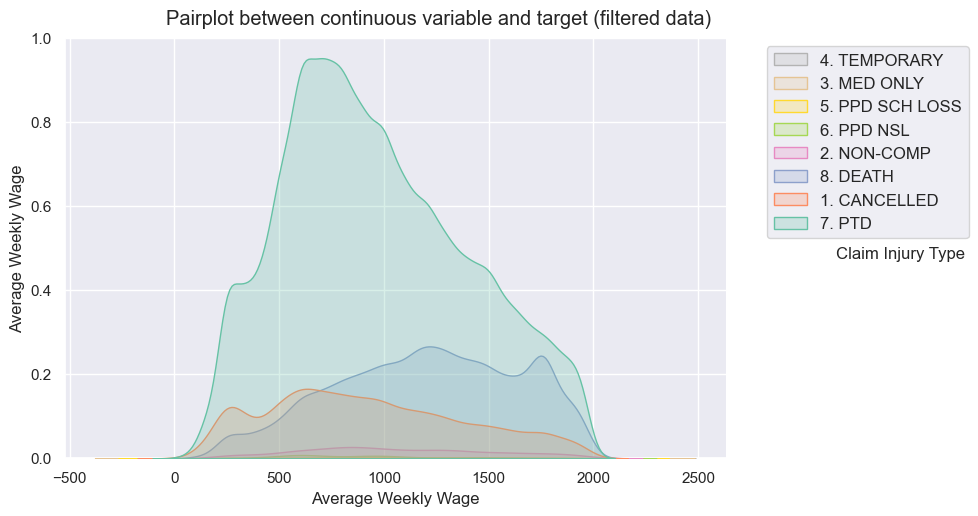

In [96]:
# Filtering the dataset to remove rows with 'Average Weekly Wage' equal to zero and extreme values(using the quantile 0.95)
filtered_df = df[(df['Average Weekly Wage'] > 0) & (df['Average Weekly Wage'] < df['Average Weekly Wage'].quantile(0.95))]

# Set figure size and plot pairplot
g = sns.pairplot(filtered_df, vars=['Average Weekly Wage'], hue='Claim Injury Type', palette='Set2', height=5, aspect=1.5)

# Add a title to the pairplot
g.fig.suptitle("Pairplot between continuous variable and target (filtered data)", y=1.02)

# Manually add legend outside of plot
plt.legend(
    labels=filtered_df['Claim Injury Type'].unique(),
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='medium'
)

plt.show()

Upon examining the graph, we can draw the following conclusions:

**1. Average Weekly Wage:** The displayed wage range spans from below 0 to approximately 2500, with negative values likely arising from data issues. The highest density is found within the range of 500 to 1000, particularly for Claim Injury Type 7, which refers to PTD.

**2. Claim Injury Type:** Claim category 7 (PTD) clearly dominates the distribution, likely due to a higher frequency of occurrence. Other claim categories, such as 8 (Death) and 3 (Medical Only), show some representation but exhibit significantly lower densities compared to category 7. The remaining claims display lower densities, making them more difficult to differentiate, as their distributions tend to overlap.

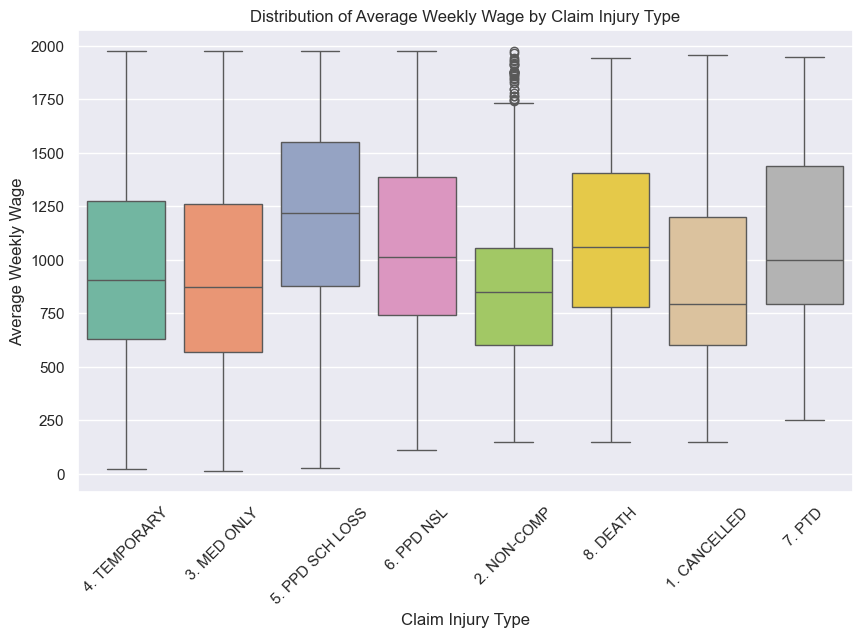

In [97]:
plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
sns.boxplot(data=filtered_df, x='Claim Injury Type', y='Average Weekly Wage', palette='Set2')
plt.title(f'Distribution of Average Weekly Wage by Claim Injury Type')
plt.xlabel('Claim Injury Type')  # Adding labels for better clarity
plt.ylabel('Average Weekly Wage')
plt.xticks(rotation=45)
plt.show()

After the observations of the Boxplot we can say that:
 | Claim \ Analyses| 7. PTD | 8. Death| 6. PPD NSL | 3. Med only and 4. Temporary | 2. Non-Comp and 1. Cancelled | 5. PPD SCH LOSS |
|----------|----------|----------|----------|----------|----------|----------|
| Median Wage  | **High** compared to other categories  | High  | Higher compared to most categories | The two categories have relatively similar medians | Lower | Nothing to point |
| Distributions  | Wide, showing significant variability in weekly wages for this claim type.  | **Narrower** than that of PTD, suggesting less variability. | Nothing to point | Narrower | Narrower compared to others | Nothing to point |
| Outliers  | Non  | Non  | Noticeable outliers | Non | Non | Moderate Outliers |

### 4.1.2. Categorical Variables <a class="anchor" id="sub_section_4_1_2"></a>
[Back to 4.1. Basic Plots](#section_4_1)<br>

Now we will create plots for the categorical variables. Since some categorical features have a high number of unique values, we will limit our analysis to the top 10 most frequent values within each categorical feature, with the target variable as the hue for better visualization.

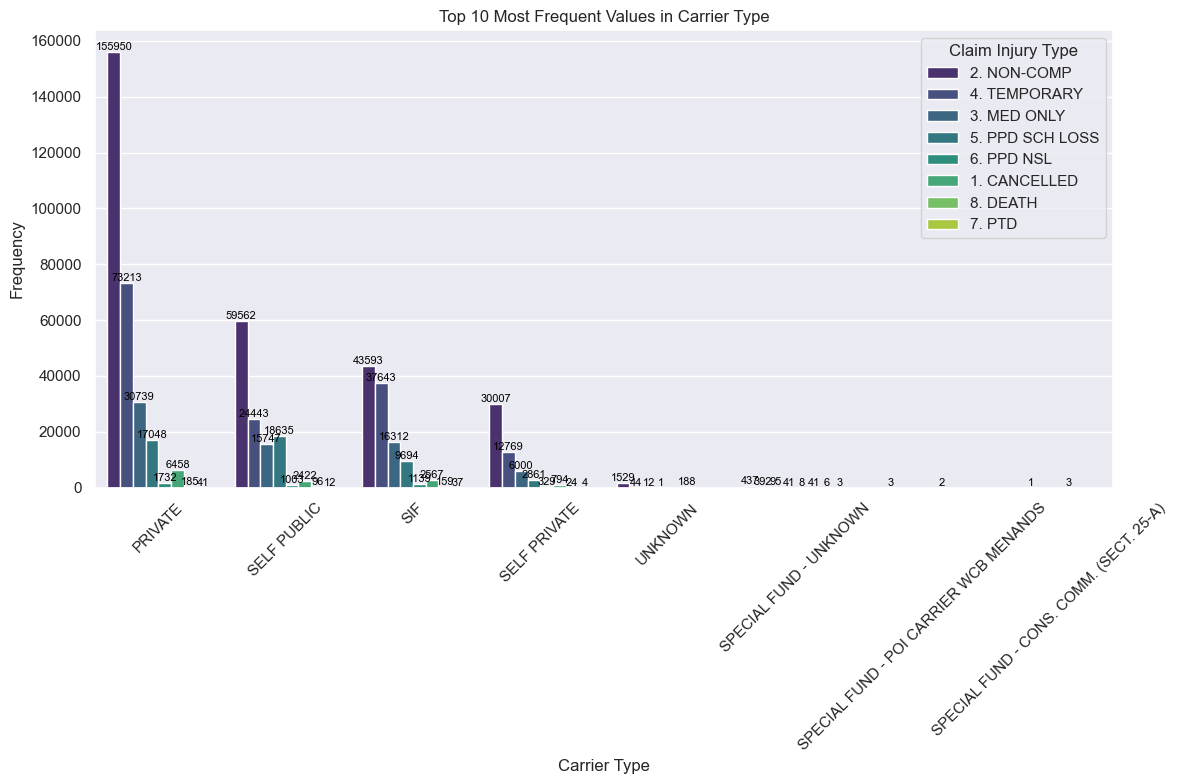

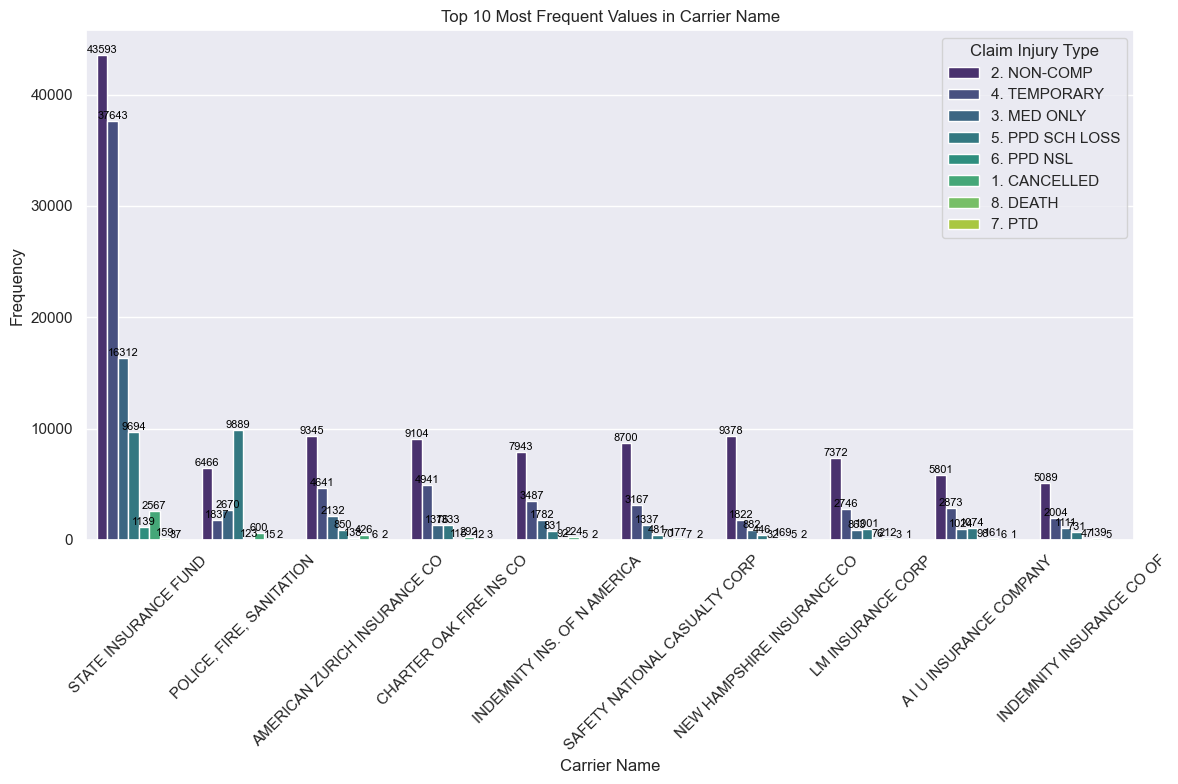

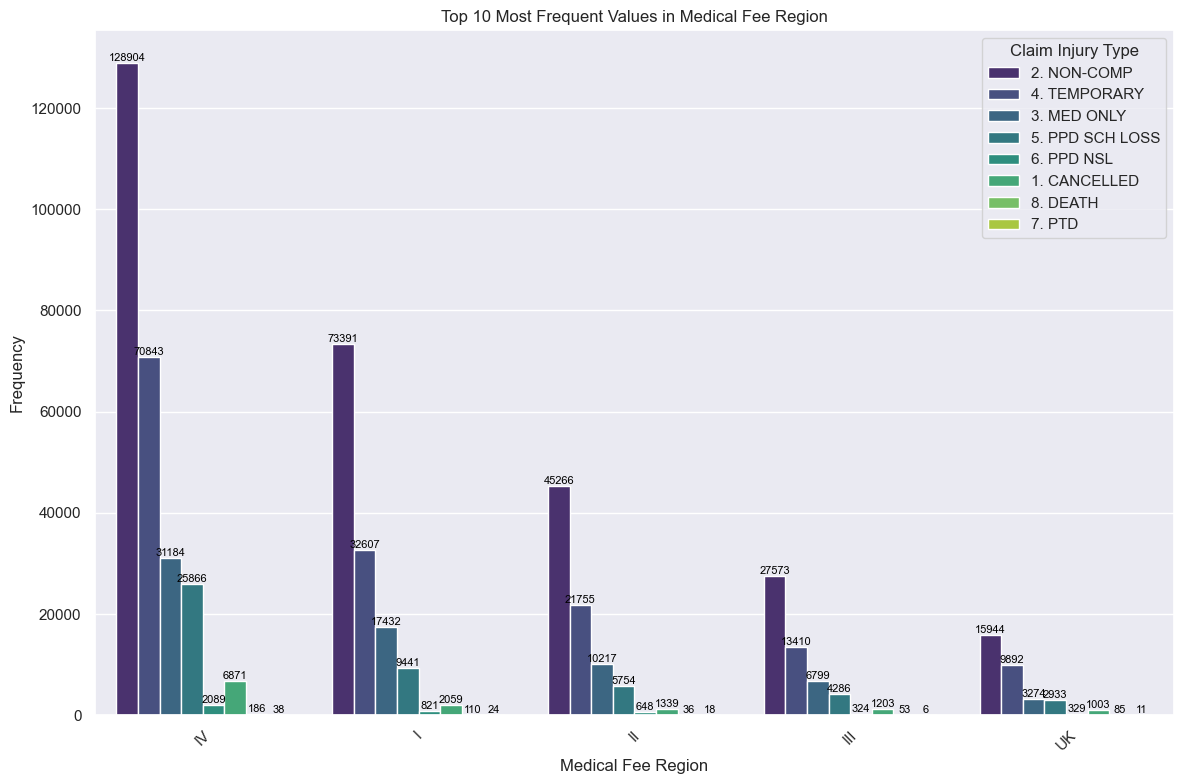

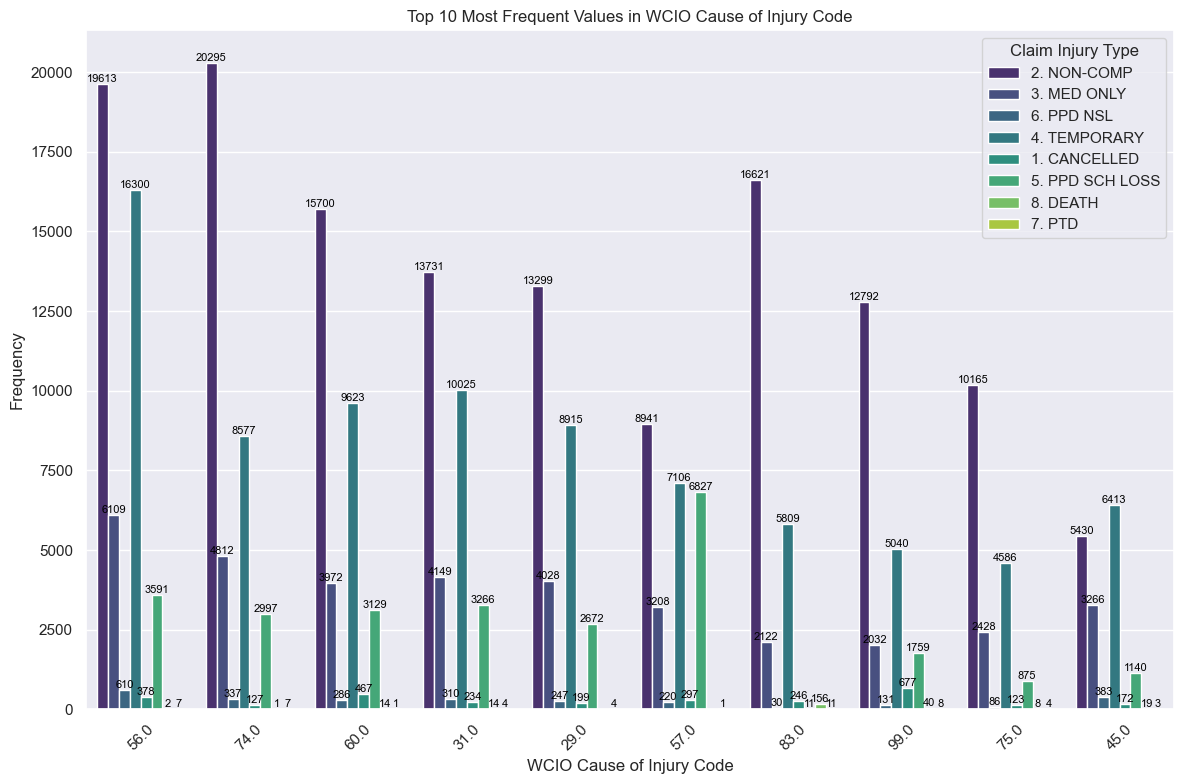

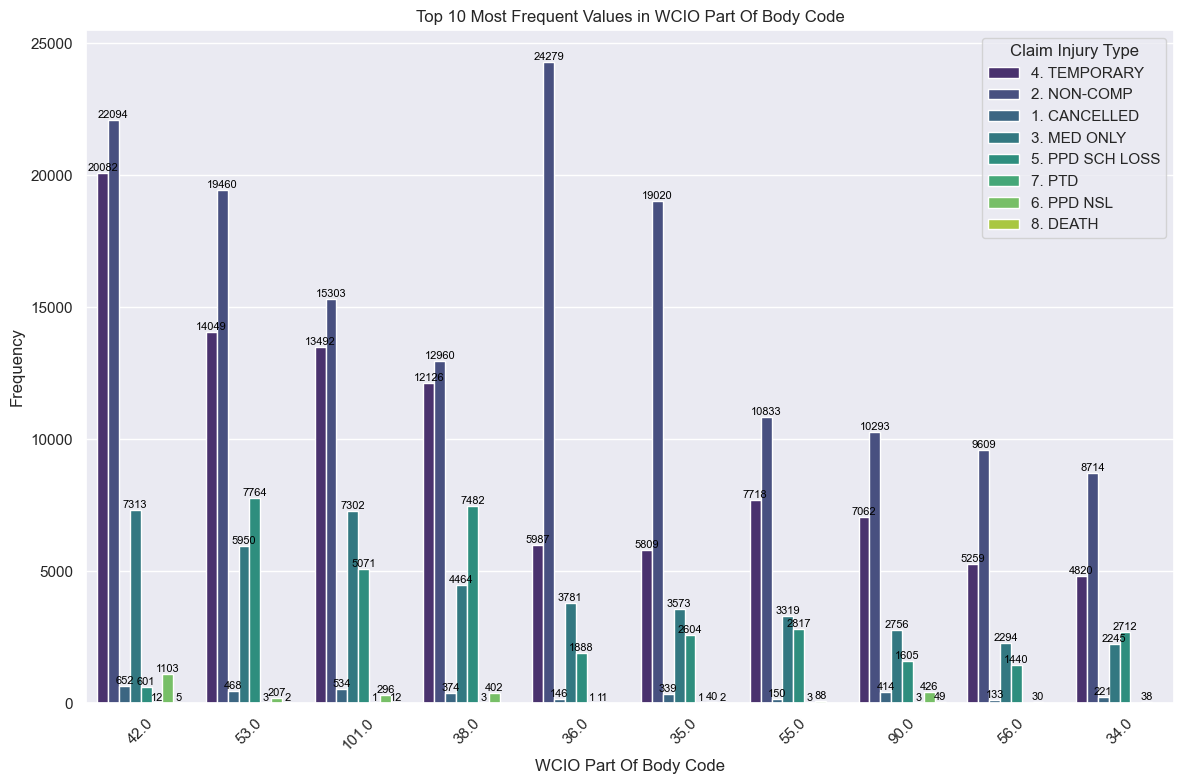

In [98]:
# Categorical Columns: Plotting Frequency Distributions with Target as Hue
# The Categorical Column was created above.

# Loop through categorical columns and create separate figures
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis', order=df[column].value_counts().iloc[:10].index)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

### Analysis of Categorical Variables

#### 1. Carrier Type

The "Carrier Type" chart shows the distribution of claims across different carrier types with "Claim Injury Type" as the hue, indicating the frequency of each injury type within each carrier type. 

Observations:
- **Private** carriers have the highest number of claims, with a significant number of "NON-COMP" (Non-compensable) injury claims. This is followed by "TEMPORARY" claims.
- **Self-Public** and **Self-Private** carriers have notable numbers of "NON-COMP" and "TEMPORARY" injury types but at a much lower frequency than private carriers.
- "UNKNOWN" carrier type has a small number of claims distributed across various injury types, indicating possible data quality issues or lack of information.
  
Conclusion:
The private sector appears to handle the majority of claims, particularly for non-compensable injury types. Other carrier types have fewer claims, possibly due to the smaller scale or specific operational areas.

#### 2. Carrier Name

The "Carrier Name" chart highlights the top 10 carriers by the number of claims with "Claim Injury Type" as the hue. 

Observations:
- **State Insurance Fund** is the leading carrier in terms of claim numbers, predominantly with "NON-COMP" and "TEMPORARY" injury claims.
- Other carriers, like **Police, Fire, Sanitation** and **American Zurich Insurance Co**, also have a high frequency of claims, but with varying distributions across injury types.
- There is a visible drop in claim numbers for carriers outside the top few, showing a long tail in the claim distribution.

Conclusion:
The State Insurance Fund handles a large volume of claims, potentially indicating its role as a major carrier in the region or its handling of a specific sector. Other carriers follow, but none reach the claim volume of the State Insurance Fund.


#### 3. District Name

The "District Name" chart shows the distribution of claims by district, with "Claim Injury Type" displayed as the hue. 

Observations:
- **NYC** (New York City) has the highest claim frequency by a significant margin, mostly for "NON-COMP" and "TEMPORARY" injury types.
- **Albany** and **Hauppauge** follow, with much lower numbers but a similar distribution pattern across injury types.
- Other districts like **Buffalo** and **Rochester** show diverse injury types but with a focus on "NON-COMP".

Conclusion:
NYC is a major hub for claims, possibly due to its population density or the concentration of industries. The distribution across other districts suggests that claim volumes vary greatly by region, with injury type distributions remaining relatively consistent.

#### 4. County of Injury

The "County of Injury" chart illustrates the top 10 counties by the number of claims, broken down by "Claim Injury Type".

Observations:
- **Suffolk** and **Queens** counties show the highest frequencies, particularly in "NON-COMP" and "TEMPORARY" injury types.
- The **Bronx** and **Kings** counties also report substantial claims, with similar injury type distributions to the leading counties.
- There is a steady decline in claim frequency as we move down the list of counties, with a more varied mix of injury types in counties with fewer claims.

Conclusion:
Certain counties like Suffolk and Queens lead in claim volumes, possibly due to larger populations or higher-risk industries. The injury type distribution remains largely similar across counties, highlighting regional patterns in claim types.

### 5. Gender

The "Gender" chart shows the distribution of claims by gender, with "Claim Injury Type" as the hue.

Observations:
- **Males (M)** have the highest number of claims, especially for "NON-COMP" and "TEMPORARY" injury types, followed by "MED ONLY".
- **Females (F)** also show significant claim numbers but at a notably lower volume than males, with a similar injury type distribution.
- Claims labeled with **U** (unspecified) gender are few but still show a diverse mix of injury types.

Conclusion:
Males have a significantly higher number of claims than females, which might suggest higher-risk roles or industries. Unspecified gender claims are minimal but should be considered for completeness.

### 6. Medical Fee Region

The "Medical Fee Region" chart illustrates the distribution of claims across different regions, with "Claim Injury Type" represented by the hue.

Observations:
- Regions **IV**, **I**, and **II** show the highest number of claims, with "NON-COMP" and "TEMPORARY" injury types being the most prevalent across these regions.
- The **UK** (United Kingdom) region also has a significant number of claims, which may indicate involvement in international cases or coverage for individuals/entities with connections to the UK.
- Region **III** has lower claim frequencies than IV, I, and II but still follows the same general pattern of injury types.
- The distribution across regions highlights that claims are concentrated in a few key areas, with a substantial number of cases likely linked to industry activities or regional policies in these zones.

Conclusion:
Regions IV, I, and II are central hubs for claims, potentially due to high industry density or specific regulatory policies that influence claim volumes. The presence of claims in the UK region indicates international aspects in the dataset, suggesting cross-border coverage or claims related to international entities.

#### 7. WCIO Cause of Injury Code
- **Insight**: Codes `56.0`, `74.0`, and `60.0` are the top causes of injuries, with varying distribution across claim types.
- **Claim Type Trends**: `MED ONLY` and `NON-COMP` types are more prevalent in these injury causes, possibly indicating the nature and severity associated with each code.
- **Observation**: Understanding which injury causes lead to `TEMPORARY` or `PPD` claims may help in assessing injury prevention efforts.

#### 8. WCIO Nature of Injury Code
- **Insight**: `52.0` and `10.0` codes dominate in injury nature, which may represent specific injury types (like sprains, fractures, etc.).
- **Claim Type Distribution**: Consistently, `NON-COMP` is prevalent across these injury codes, though other types like `TEMPORARY` also appear frequently.
- **Observation**: This variable provides insight into the types of injuries commonly associated with higher claim counts.

#### 9. WCIO Part of Body Code
- **Insight**: Parts `42.0` and `53.0` are the most affected, suggesting particular body parts are more prone to workplace injuries.
- **Claim Type Trends**: `TEMPORARY` claims are frequently associated with these body parts, possibly indicating less severe injuries that lead to temporary disability.
- **Observation**: This can guide ergonomic adjustments or protective equipment focus to reduce injuries in these body parts.

### 4.1.3. Discrete Variables <a class="anchor" id="sub_section_4_1_3"></a>
[Back to 4.1. Basic Plots](#section_4_1)<br>

Next, we will plot the discrete columns, focusing on the 15 most frequent values for each feature, with the target variable as the hue to enhance interpretability.

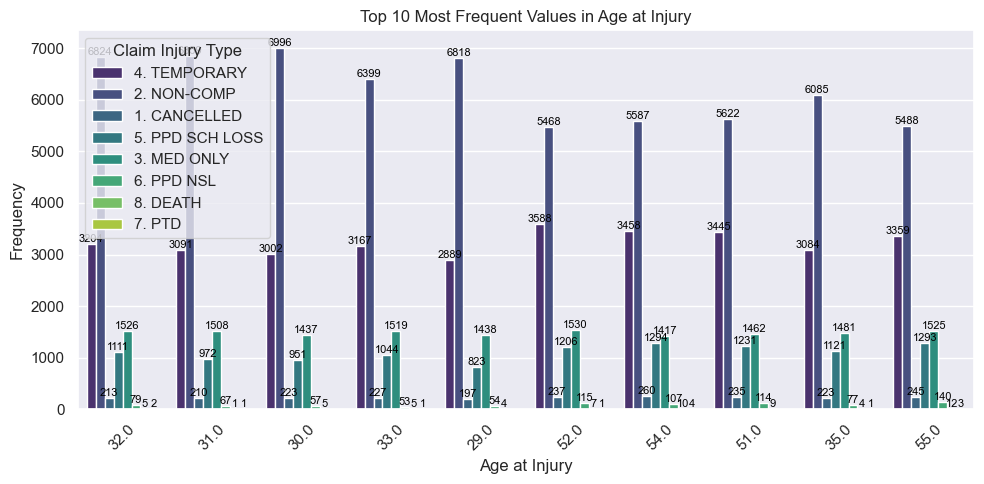

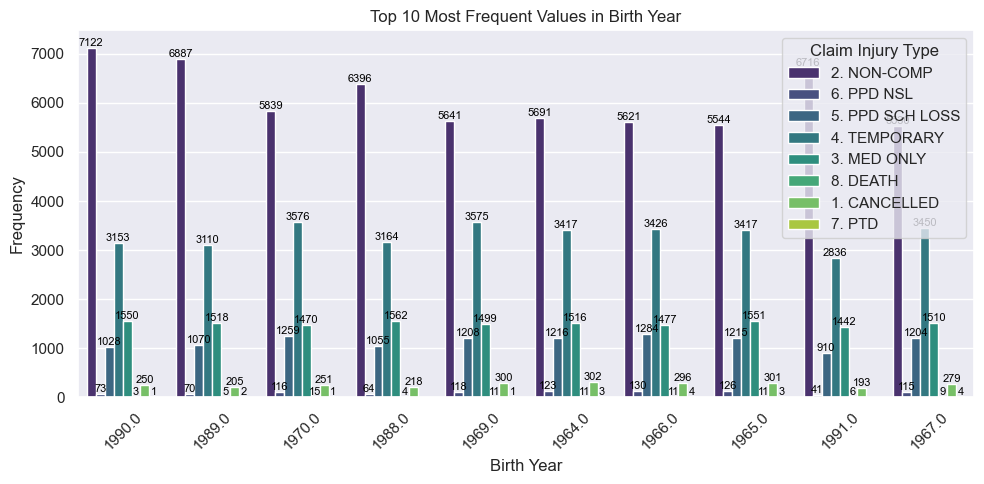

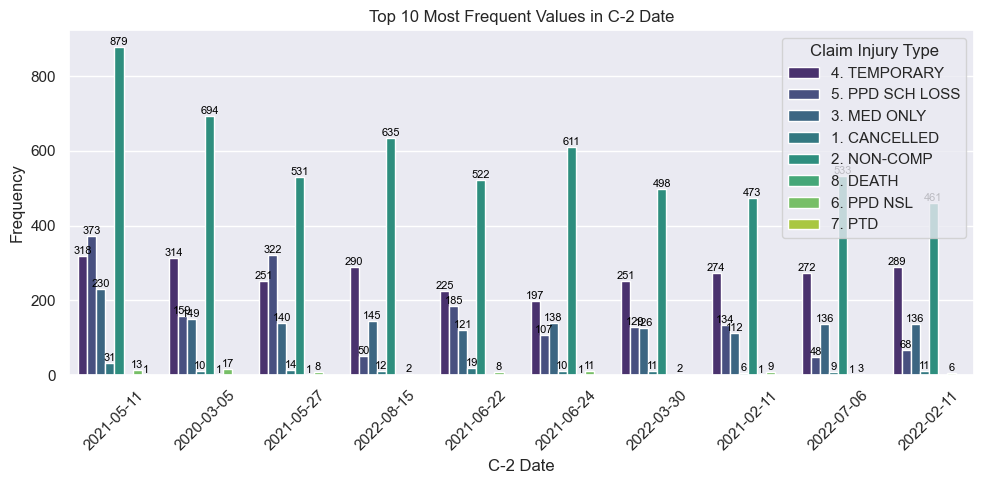

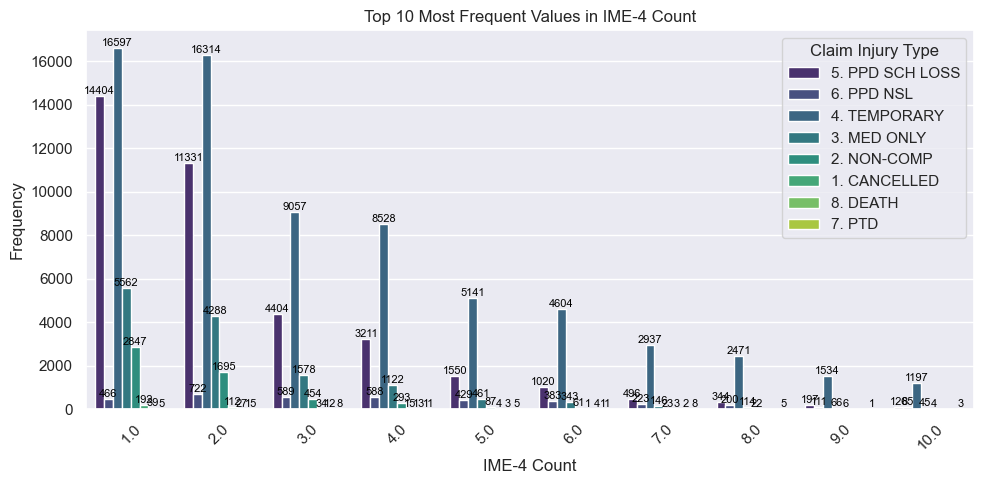

In [99]:
# Discrete Columns: Plotting Top 15 Most Frequent Values with Target as Hue
# The Discrete Column was created above.

# Loop through discrete columns and create separate figures
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    
    # Select the top 10 most frequent values for the current column
    top_10_values = df[column].value_counts().nlargest(10).index
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df[df[column].isin(top_10_values)], x=column, hue='Claim Injury Type', palette='viridis', order=top_10_values)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

### Analysis of Discrete Variables

#### 1. Accident Date
- **Insight**: Dates like `2020-03-01`, `2022-02-07`, and `2022-07-05` show high accident frequencies, especially `2020-03-01` with `781 occurrences`, suggesting specific external events or mass reporting.
- **Claim Injury Type**: The `2. NON-COMP` category dominates, followed by `4. TEMPORARY` and `3. MED ONLY`, which are less frequent. Severe categories such as `8. DEATH`, `7. PTD`, and `6. PPD NSL` are rare, with fewer than `10 occurrences per date`.
- **Observations**: Accidents peaks may reflect seasonal cycles or industry conditions. The dominance of `NON-COMP` aligns with less severe incidents, while the low frequency of severe categories highlights their rarity and impact.

#### 2. Age at Injury
- **Insight**: Ages around `32`, `52`, and `35` have the highest frequency, suggesting certain age groups may be more prone to injury in this dataset.
- **Claim Injury Type Trends**: Similar to other variables, the `NON-COMP` claim type dominates across all age groups, especially in the 30s and 50s.
- **Observations**: This could indicate specific age ranges where the workforce may be more susceptible to injuries, possibly due to experience or physical demands related to the work.

#### 3. Assembly Date
- **Insight**: Dates such as `2021-05-11`, `2020-03-06`, and `2022-04-01` show high claim frequencies, especially `2021-05-11` with a peak of `815 occurrences`.
- **Claim Injury Type**: The `4. TEMPORARY` category leads, indicating it is the most common injury type. `5. PPD SCH LOSS` is also notable, while categories like `1. CANCELLED`, `8. DEATH`, and `2. NON-COMP` are less frequent, often under `50 occurrences`.
- **Observations**: Spikes in claims may relate to external factors like work conditions or seasonal demands. The prominence of `4. TEMPORARY` suggests these injuries are typically recoverable, while rarer categories, such as `8. DEATH`, highlight their impact despite low occurrence.

#### 4. Birth Year
- **Insight**: Birth years are highly concentrated around `1990`, `1989`, and `1988`, with frequencies decreasing for other years. The year `1990` leads with the highest count (`7122 occurrences`).
  
- **Claim Injury Type Distribution**: The `NON-COMP` claim type consistently dominates across all birth years, particularly in high-frequency years like `1990` and `1989`. Severe claim types such as `DEATH` and `PTD` remain rare, with fewer than `10 occurrences per year`.  
- **Trend**: Claims are concentrated in specific birth years, reflecting workforce demographics, with lower frequencies in older age groups.

#### 5. C-2 Date

- **Insight**: `2021-05-11` has the highest frequency (`879 occurrences`), followed by `2020-03-05` and `2022-08-15`.  
- **Claim Injury Type Distribution**: `NON-COMP` dominates, peaking at `879 occurrences` on `2021-05-11`, while `TEMPORARY` and `MED ONLY` are also frequent. Severe types like `DEATH` and `PTD` are rare, with fewer than `20 occurrences per date`.  
- **Trend**: High frequencies likely reflect reporting deadlines or significant events, with `NON-COMP` focusing on less severe cases.  

#### 6. Number of Dependents
- **Insight**: The majority of records have `0`, `1`, or `2` dependents, with a significantly higher frequency in the `NON-COMP` claim injury type.
- **Distribution**: Higher counts of dependents are less common, with a steep drop after `3` dependents.
- **Claim Injury Type Distribution**: `NON-COMP` and `TEMPORARY` types are more common among records with `0` to `3` dependents, while other claim types appear relatively less frequently across all dependent numbers.

#### 7. IME-4 Count
- **Insight**: The `IME-4 Count` values are highly concentrated around `1`, `2`, and `3`, showing a lower count as the value increases.
- **Claim Injury Type Distribution**: `TEMPORARY` and `PPD SCH LOSS` claim types are more common in cases with lower `IME-4 Count`, suggesting fewer medical evaluations for these injury types.
- **Trend**: Higher `IME-4 Count` values appear less frequently, indicating that the number of independent medical exams is limited for most claims.

#### 8. Industry Code
- **Insight**: Codes `62.0`, `92.0`, and `61.0` are the most frequent, which may correspond to specific industries more prone to injuries.
- **Claim Type Distribution**: `NON-COMP` claims are notably high across these industry codes, showing that certain industries may have different injury claim distributions.
- **Observation**: Industries corresponding to these codes might have higher injury risks, warranting further investigation or preventive measures.

#### 9. Zip Code
- **Insight**: Certain ZIP codes (`11236`, `10940`, etc.) have notably higher injury frequencies, which may point to geographic regions with higher claims.
- **Claim Type Distribution**: Distribution across claim types varies, with `NON-COMP` frequently leading in many of these areas.
- **Observation**: Regional analysis of injury claims can be insightful for targeted interventions or support in high-claim ZIP codes.

#### 10. First Hearing Date

- **Insight**: The most frequent dates are `2022-01-20` (`240 occurrences`),  `2022-04-15` (`227 occurrences`) and `2020-12-21` (`224 occurences`). Frequencies decrease significantly for other dates.  
- **Claim Injury Type Distribution**: `MED ONLY` dominates across all dates, with `TEMPORARY` and `PPD SCH LOSS` being secondary. Severe claim types like `DEATH` and `PTD` remain rare, with fewer than `10 occurrences per date`.  
- **Trend**: Peaks likely align with specific administrative or procedural events, with `MED ONLY` claims being the most common.  

### 4.1.4. Binary Variables <a class="anchor" id="sub_section_4_1_4"></a>
[Back to 4.1. Basic Plots](#section_4_1)<br>

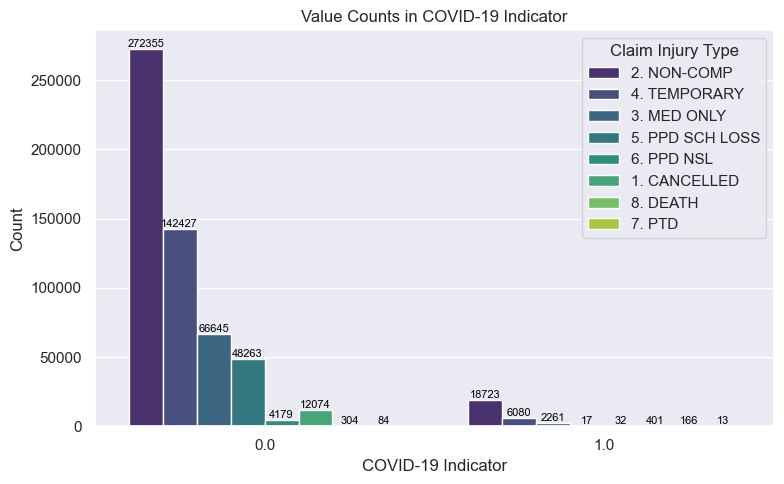

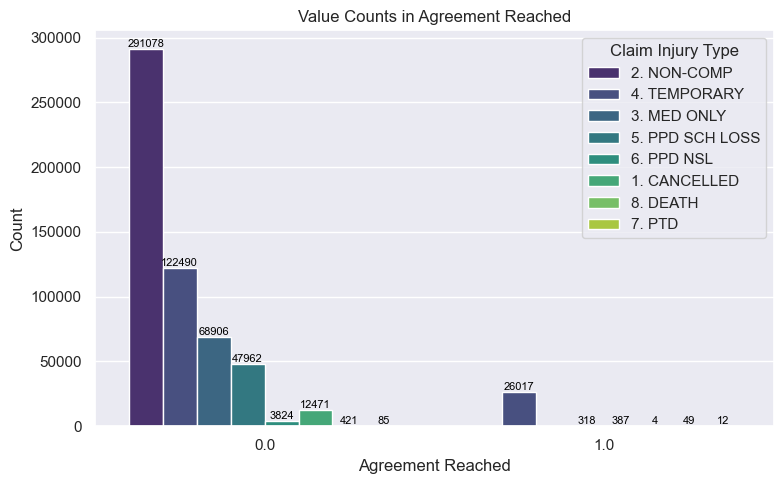

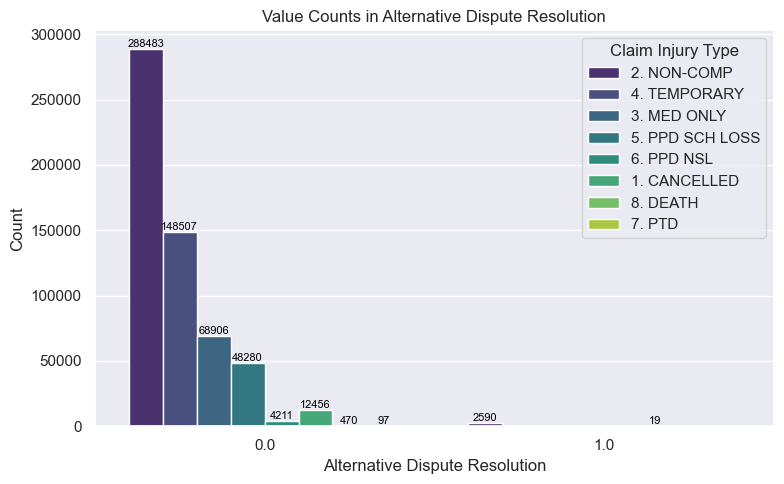

In [100]:
# Binary Columns: Plotting Counts of Values with Target as Hue
# The Binary Column was created above.

# Loop through binary columns and create separate figures
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis')
    
    # Set title and labels
    plt.title(f'Value Counts in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

### Analysis of Binary Variables

#### Attorney/Representative

- This chart displays the count of cases based on whether they had an Attorney or Representative involved (`1`) or not (`0`).
- Cases without an attorney or representative are the majority, especially for the `NON-COMP` and `TEMPORARY` injury types.
- The presence of an attorney or representative is more common among cases with `TEMPORARY` and `MED ONLY` injury types but significantly lower in number than cases without representation across all injury types.

#### COVID-19 Indicator

- This plot shows the distribution of cases based on whether they were associated with COVID-19 (`1`) or not (`0`).
- Cases not related to COVID-19 dominate across all injury types, with a significant majority in `NON-COMP` and `TEMPORARY` injury types.
- COVID-19-related cases are present but in much smaller numbers, primarily impacting `NON-COMP` and `TEMPORARY` injury types.

#### Agreement Reached

- This chart illustrates whether an agreement was reached (`1`) or not (`0`) in claims across different injury types.
- The majority of cases did not reach an agreement, with a high count in the `NON-COMP`, `TEMPORARY`, and `MED ONLY` categories.
- Cases where an agreement was reached are relatively fewer but still show some presence, mainly in `TEMPORARY` and `MED ONLY` injury types.

#### Alternative Dispute Resolution

- This plot represents the use of alternative dispute resolution (ADR) in claims, indicating `1` if used and `0` otherwise.
- ADR was not utilized in the majority of cases, with high counts for `NON-COMP` and `TEMPORARY` injury types.
- For cases where ADR was employed, it is relatively more common in `TEMPORARY` and `MED ONLY` injury types, although the numbers are still low compared to cases without ADR.


## 4.2. Multivariate Analysis <a class="anchor" id="section_4_2"></a>


[Back to 4. Visual Exploration](#chapter4)<br>



In this section, we will conduct multivariate analyses with two primary objectives:
- Understanding the correlation between different variables.
- Examining the relationship between the features and the target variable (Claim Injury Type).

In the following code, we will explore binary and categorical variables by visualizing how binary features impact different categorical variables.

Binary Variable: Alternative Dispute Resolution



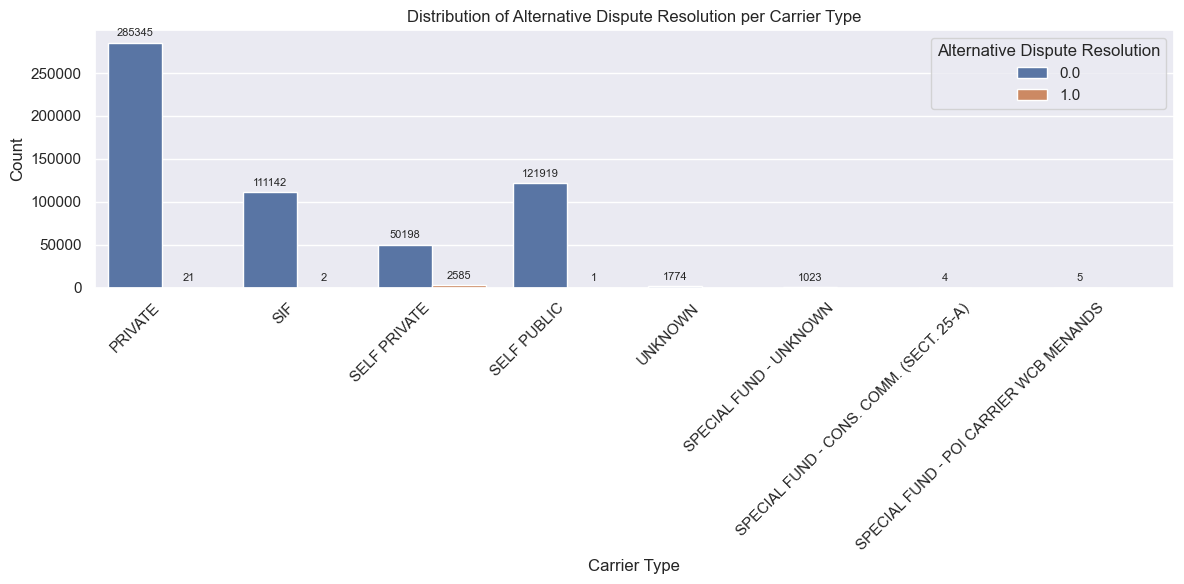

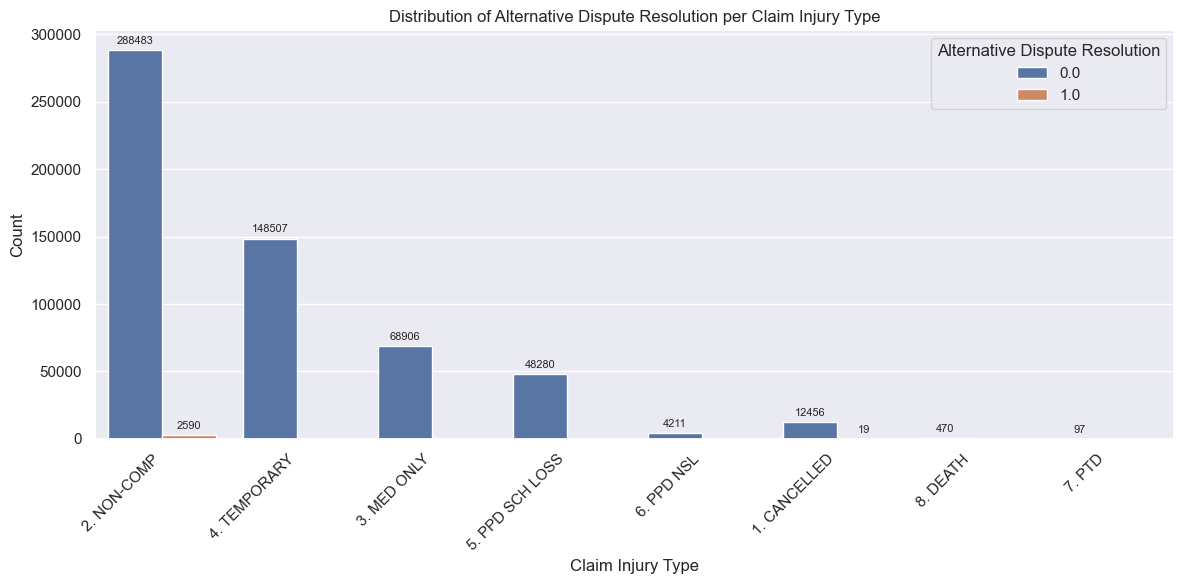

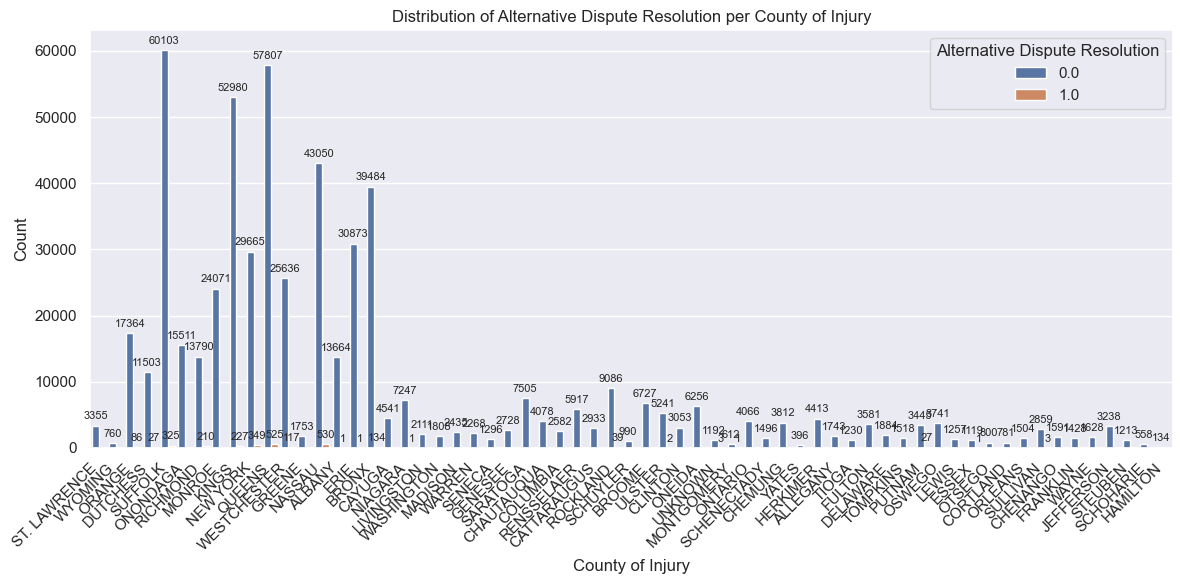

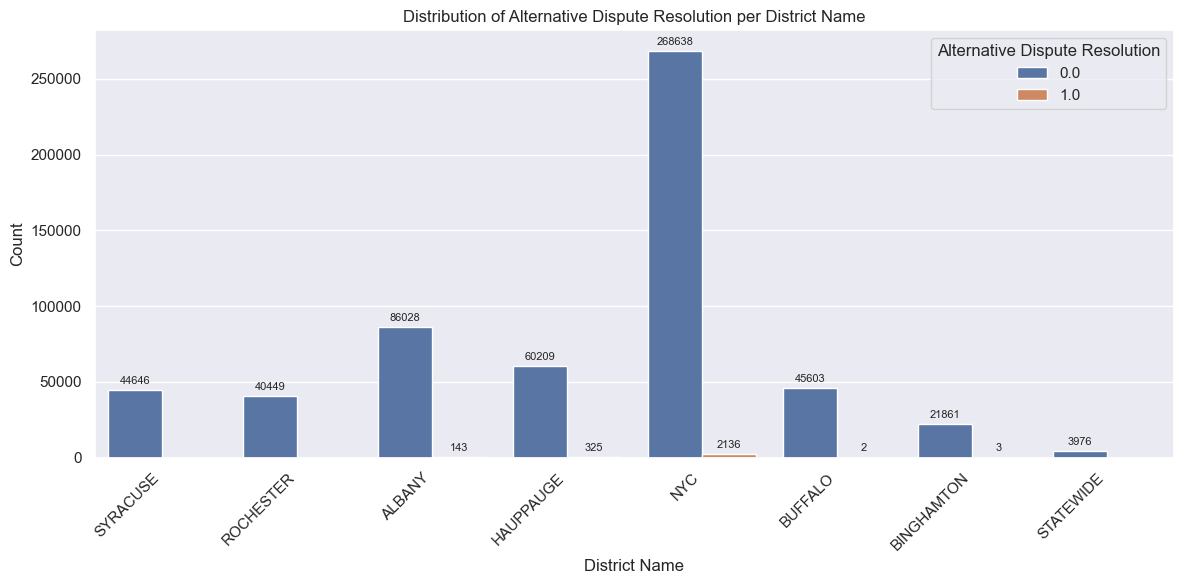

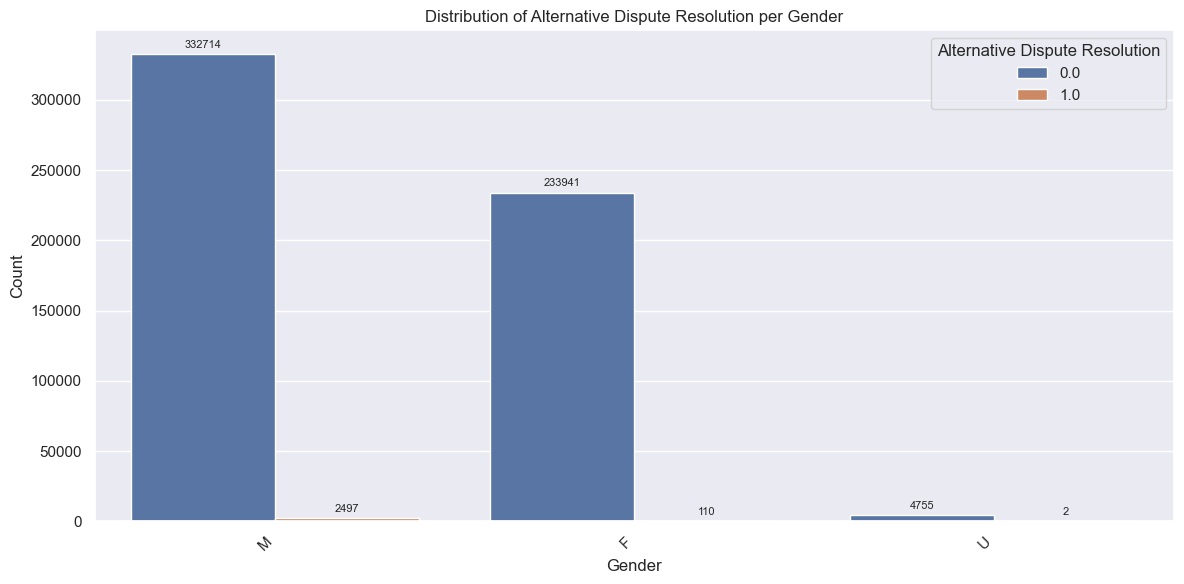

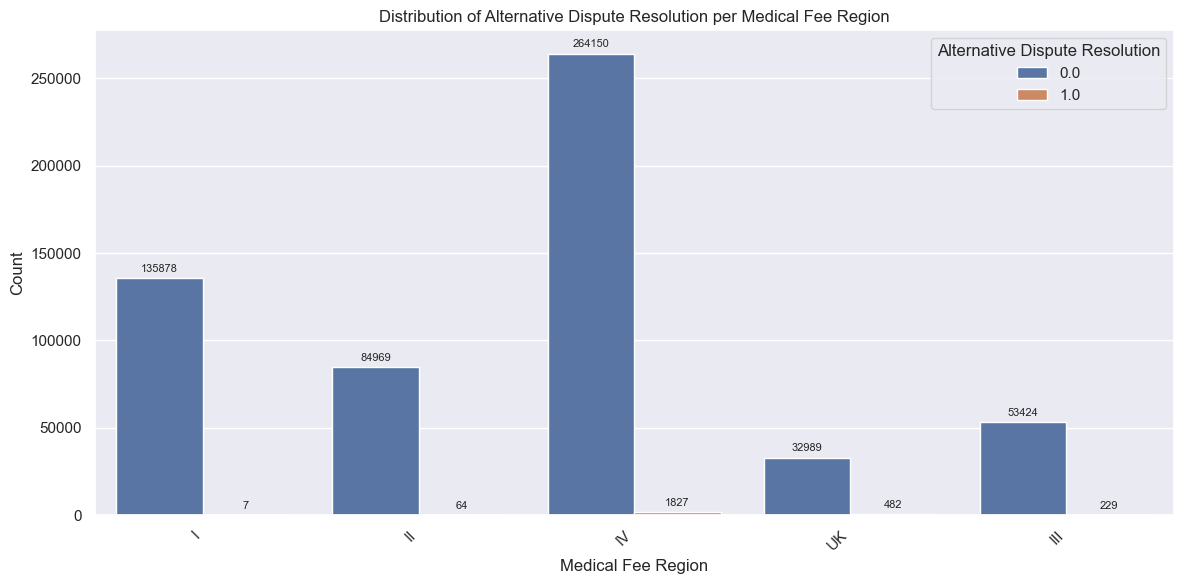

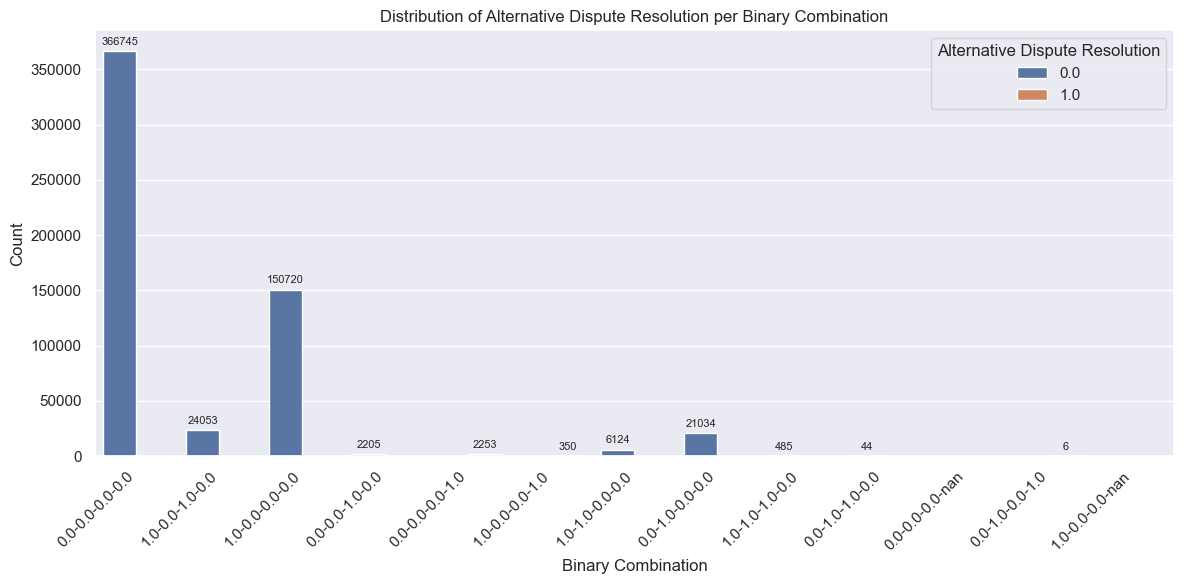

Binary Variable: Attorney/Representative



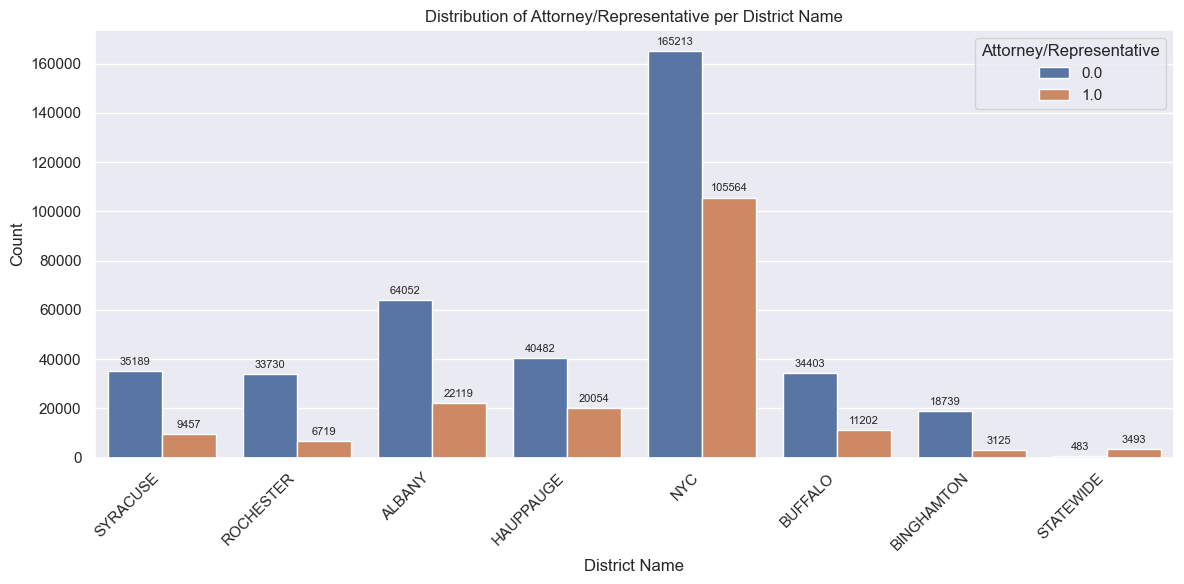

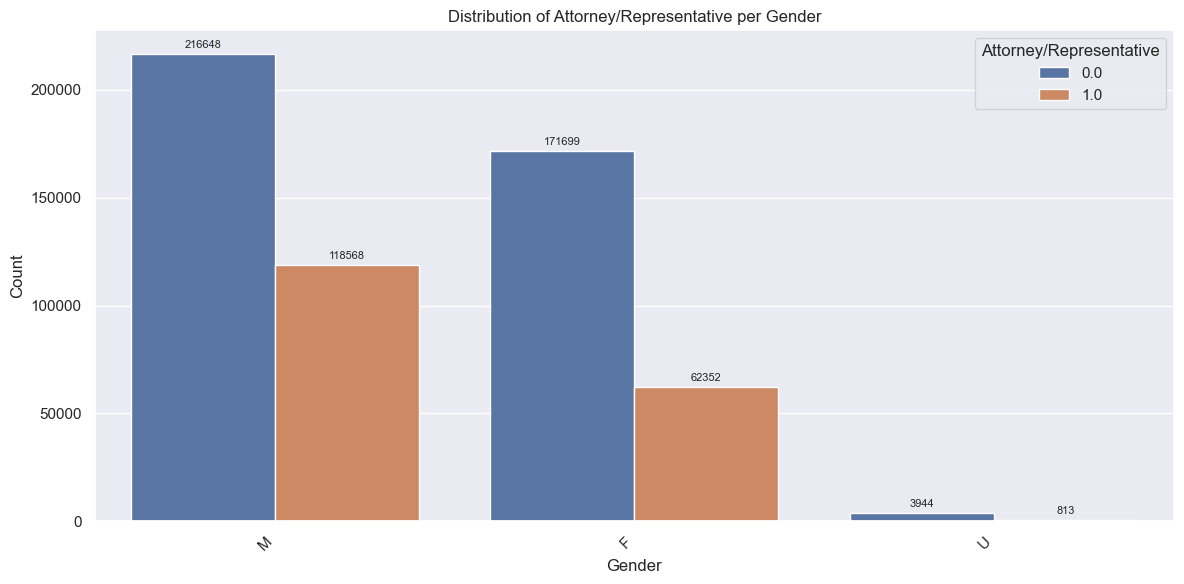

Binary Variable: COVID-19 Indicator



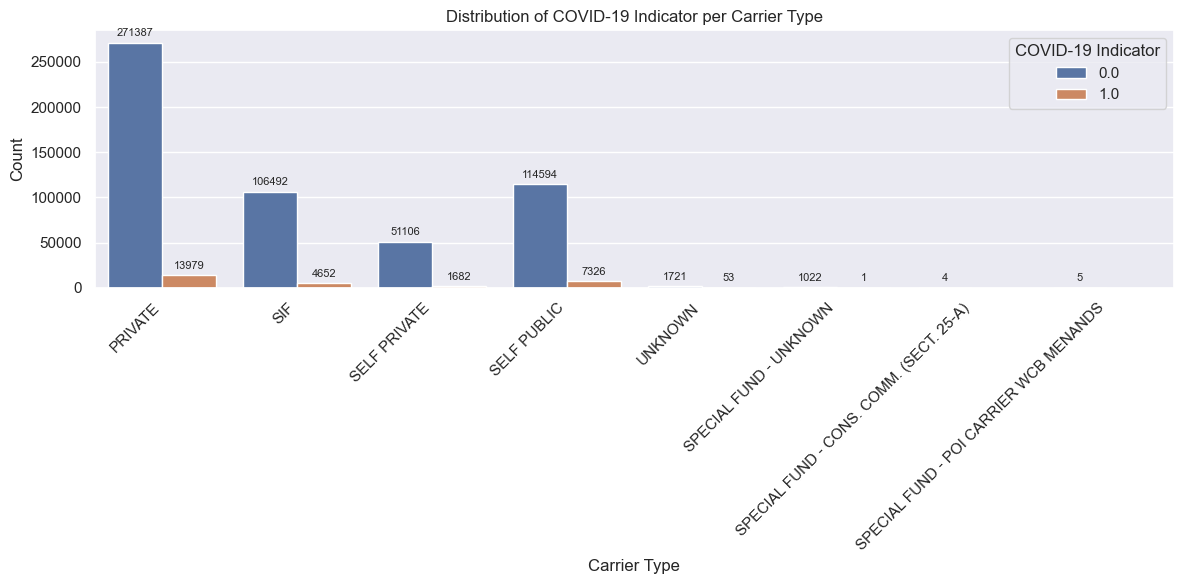

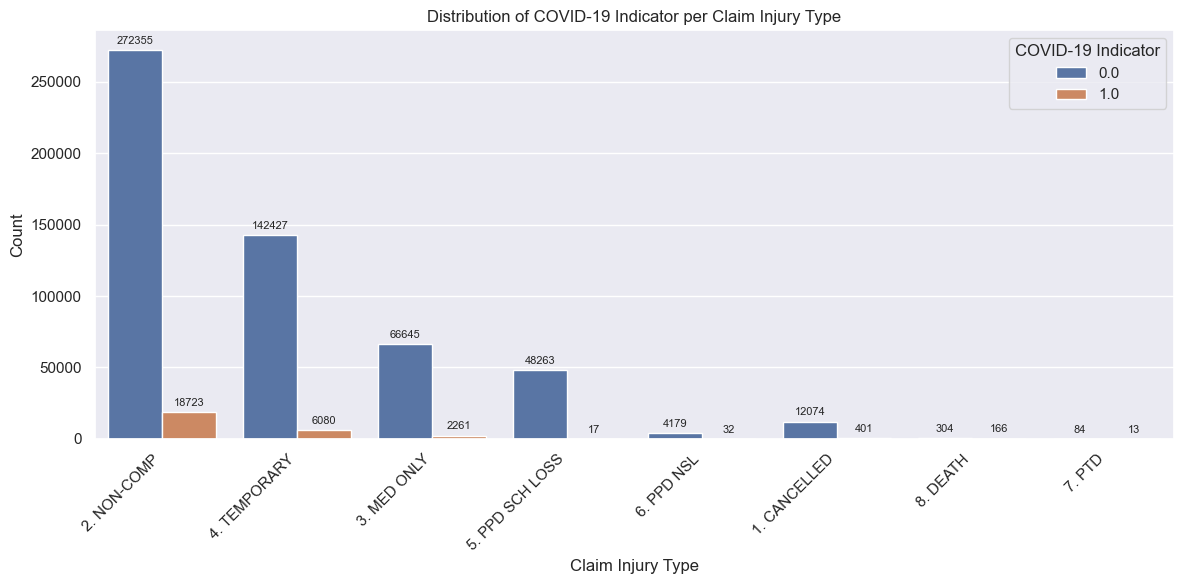

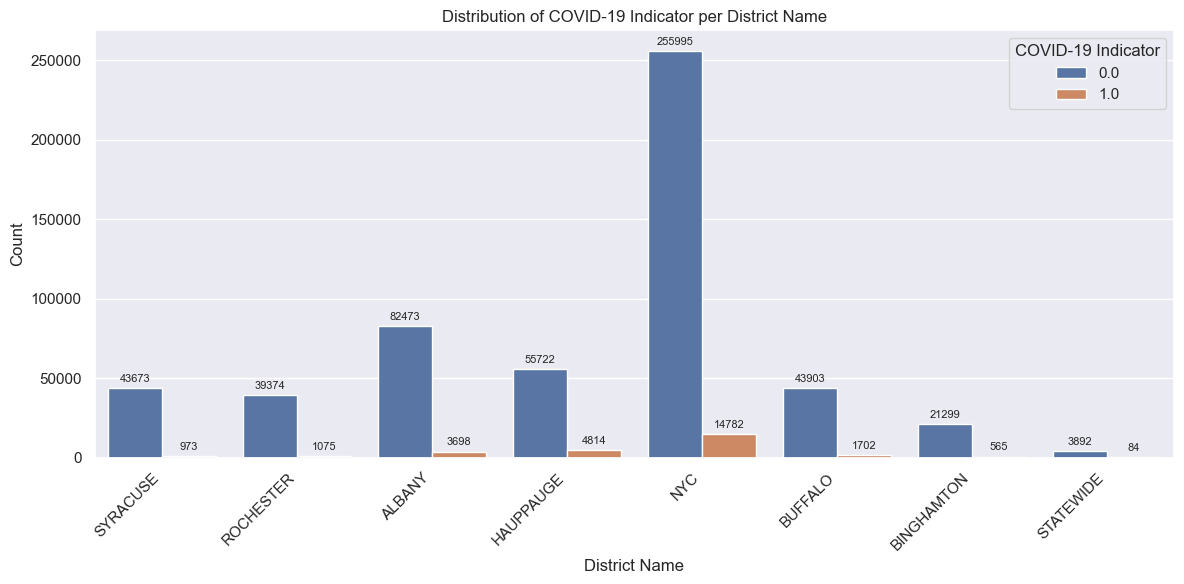

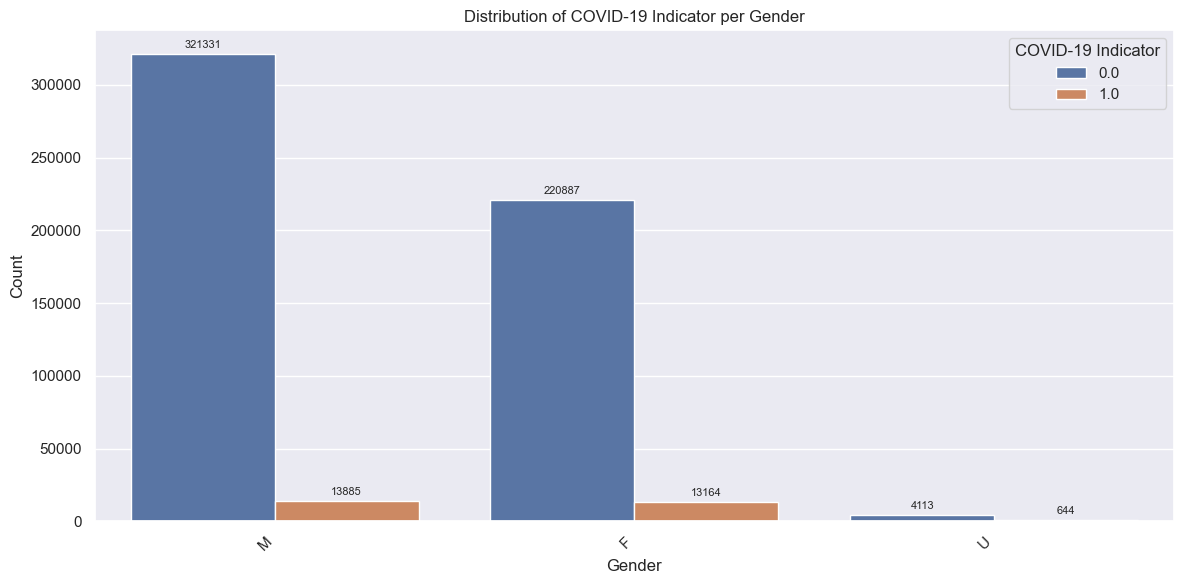

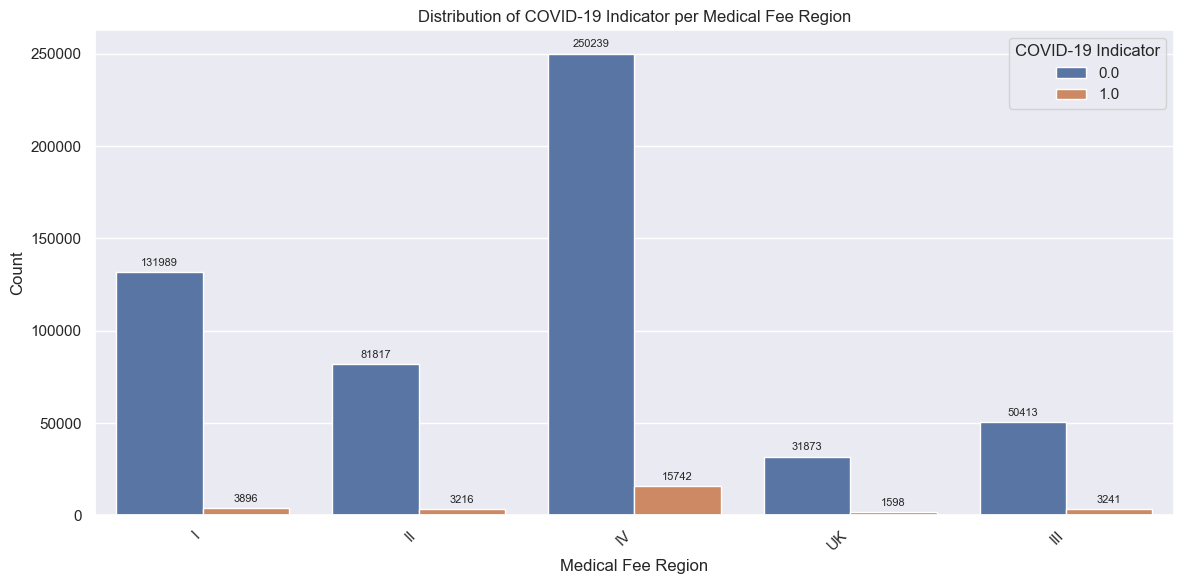

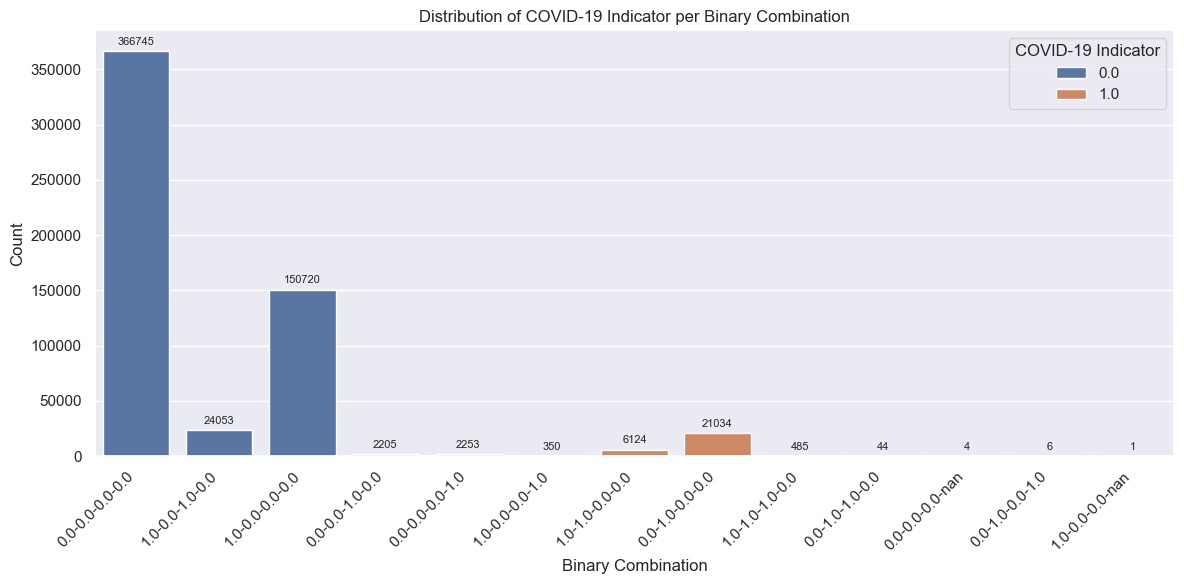

Binary Variable: Agreement Reached



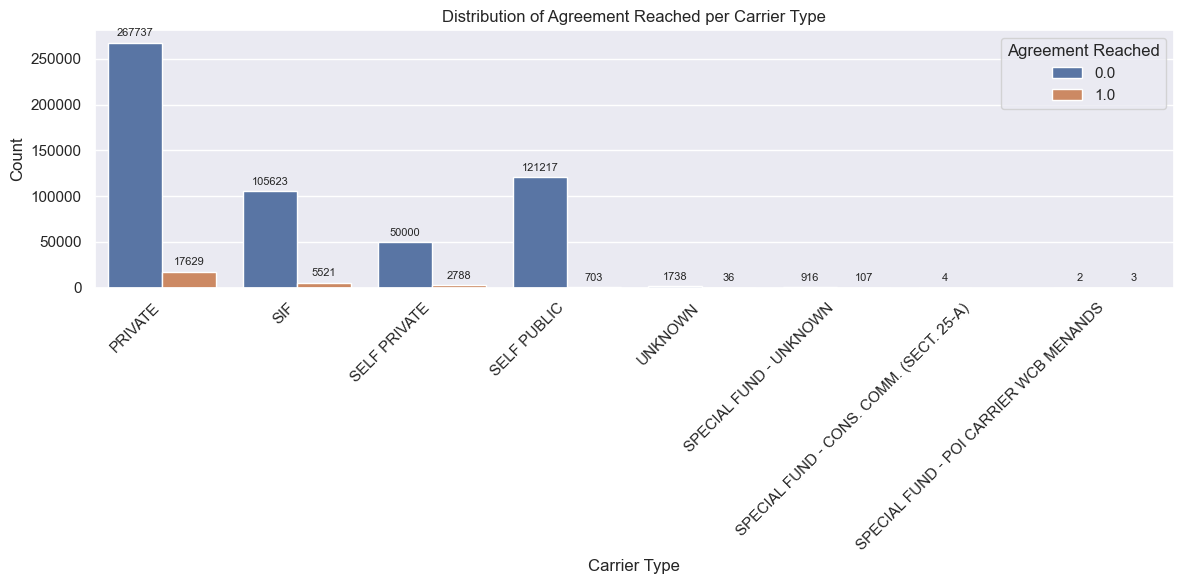

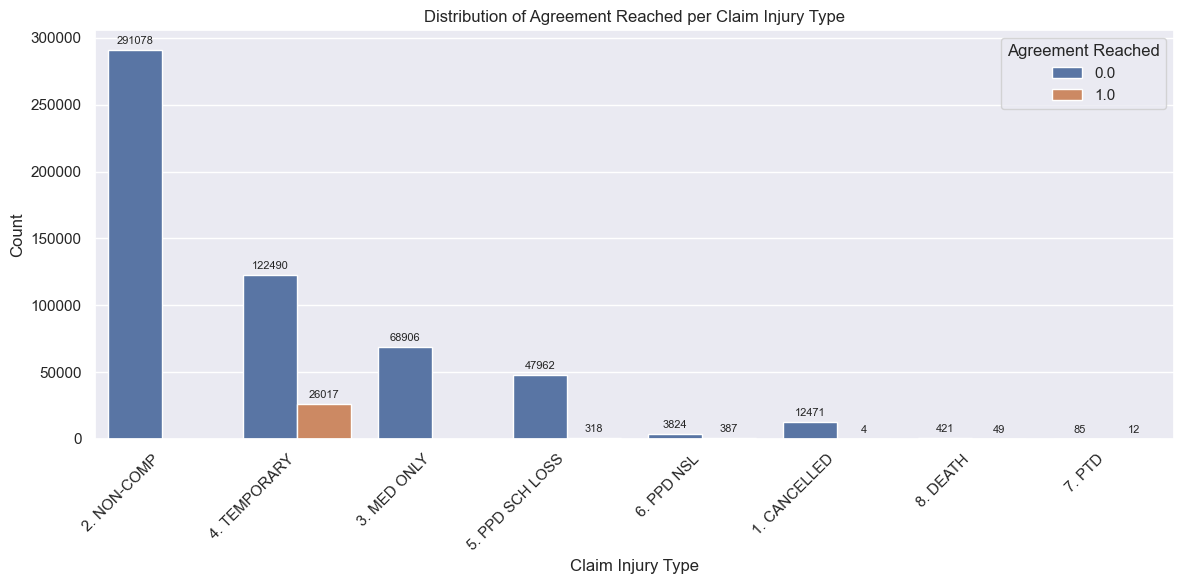

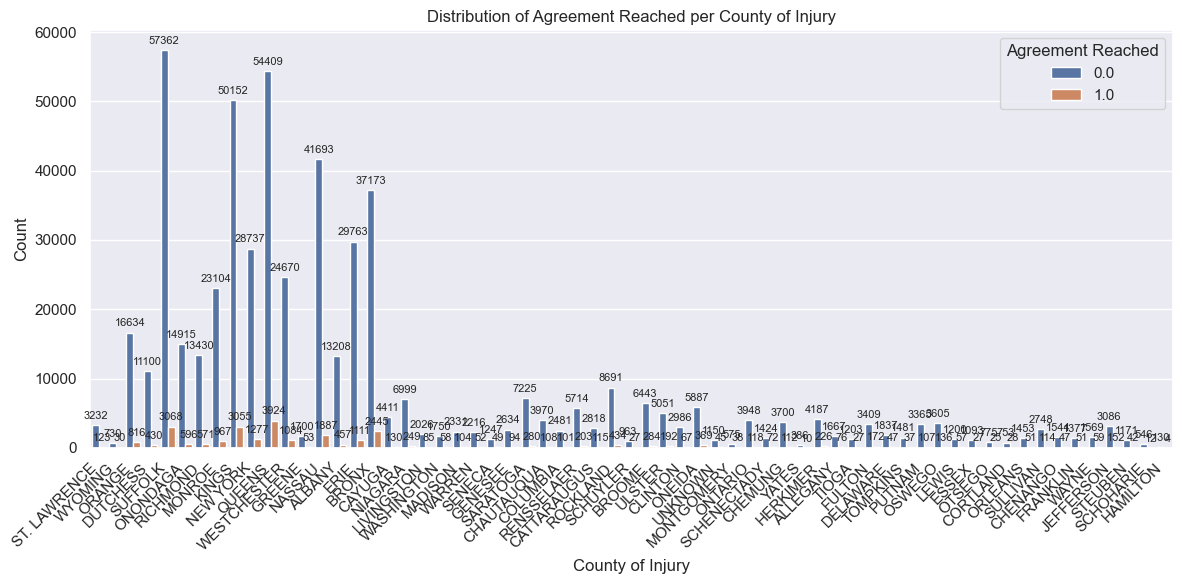

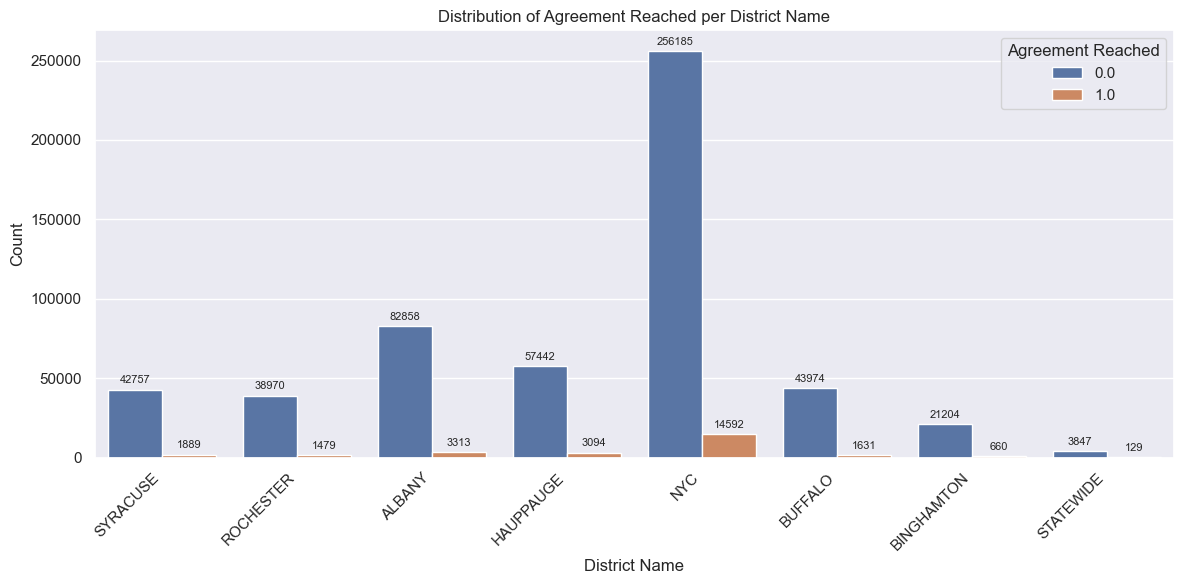

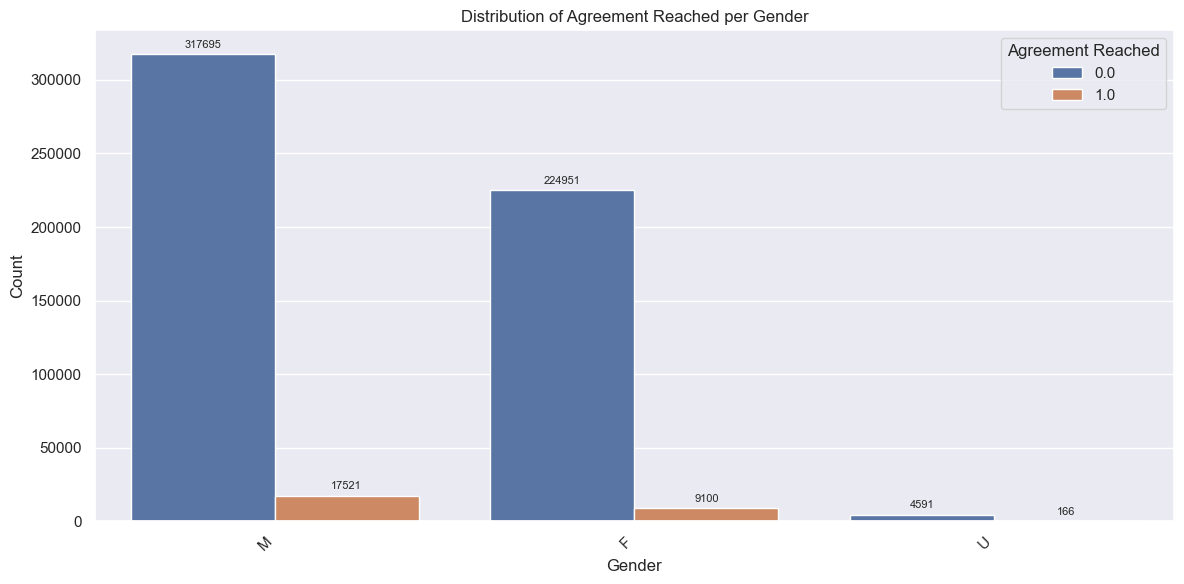

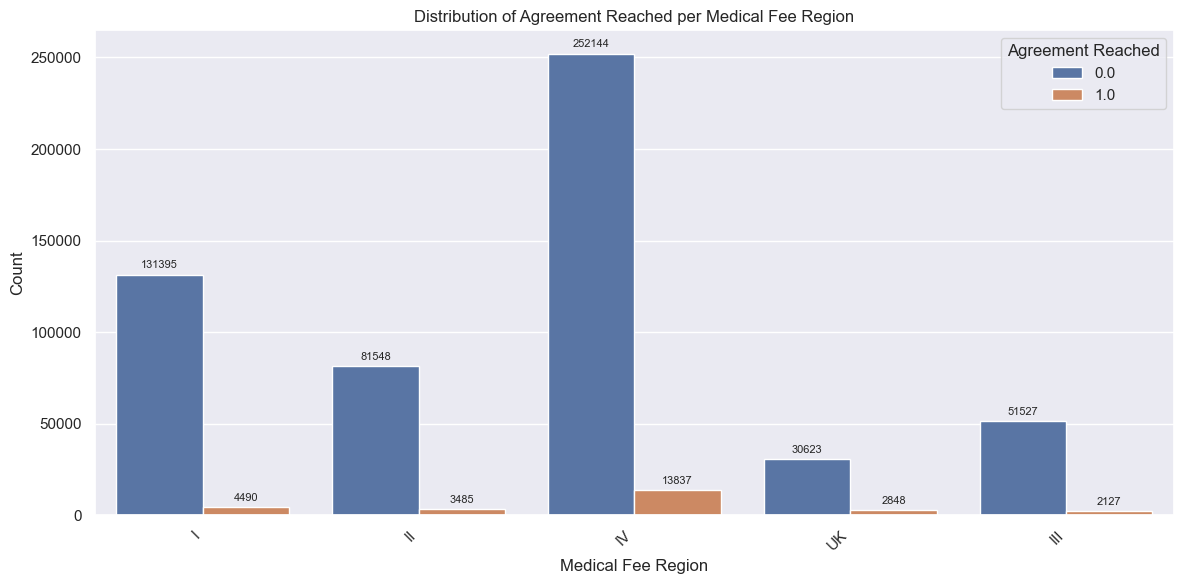

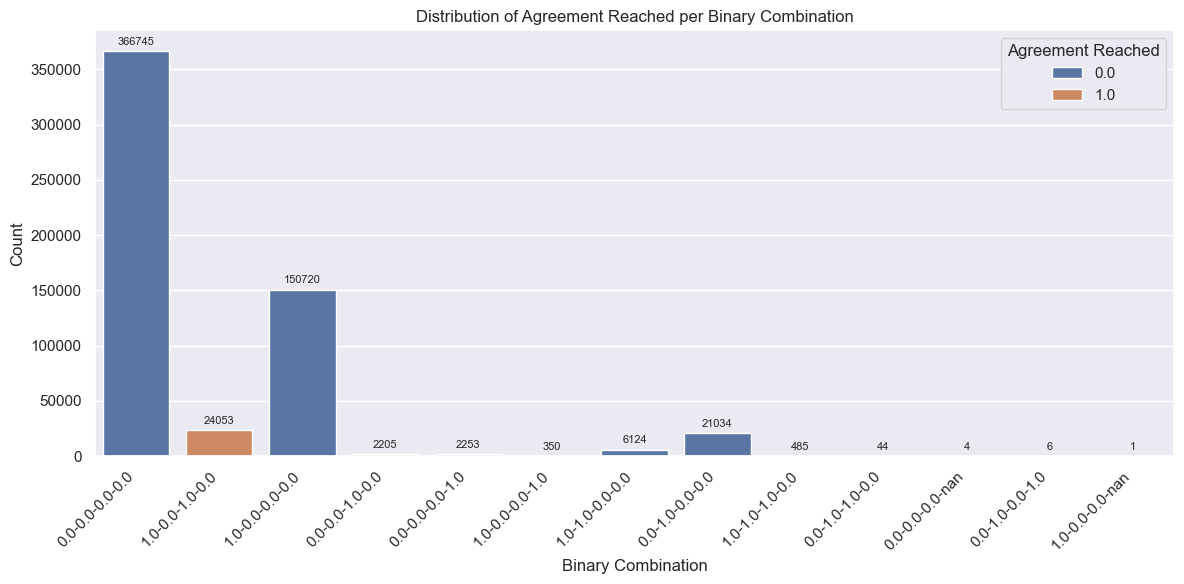

In [ ]:
#  Get binary variables from the dataframe
binary_vars = [col for col in df.columns if df[col].nunique() == 2]  # Identify binary variables

# Define the columns to exclude
exclude_columns = ['Zip Code', 'Carrier Name']  # This columns have many elements to evalute, so we are going to exclude.

# Get categorical variables excluding the specified columns
categorical_vars = [col for col in df.columns if df[col].dtype == 'object' and col not in exclude_columns]

   
# Generate count plots for binary and categorical variables
plot_count_for_binary_and_categorical(df, binary_vars, categorical_vars)


__`How binary columns impact the Claim Injury Type`__

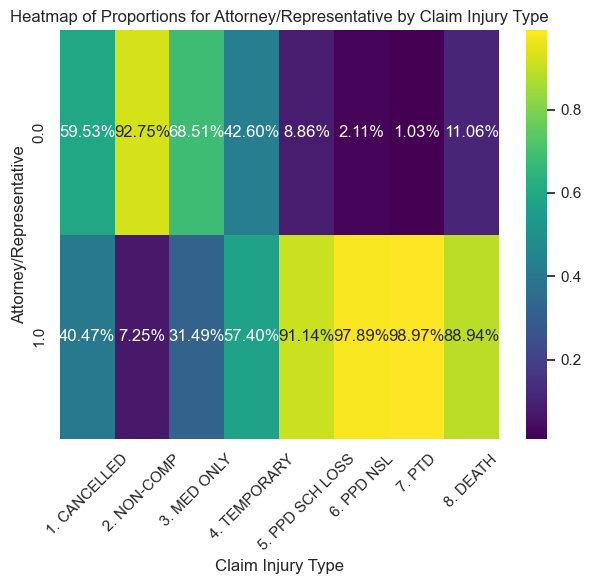

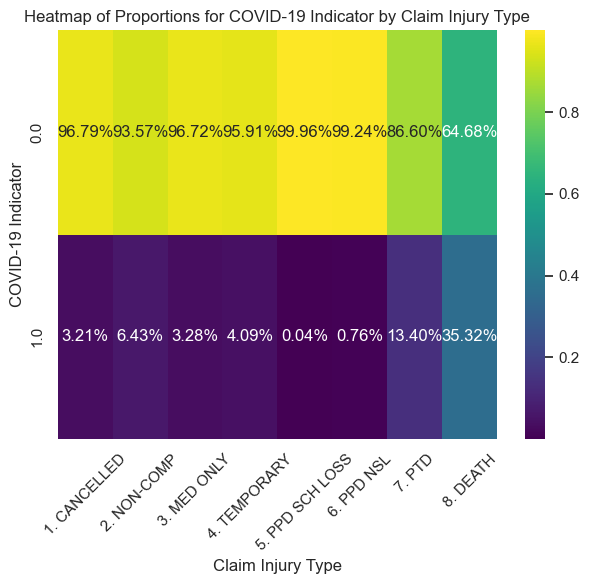

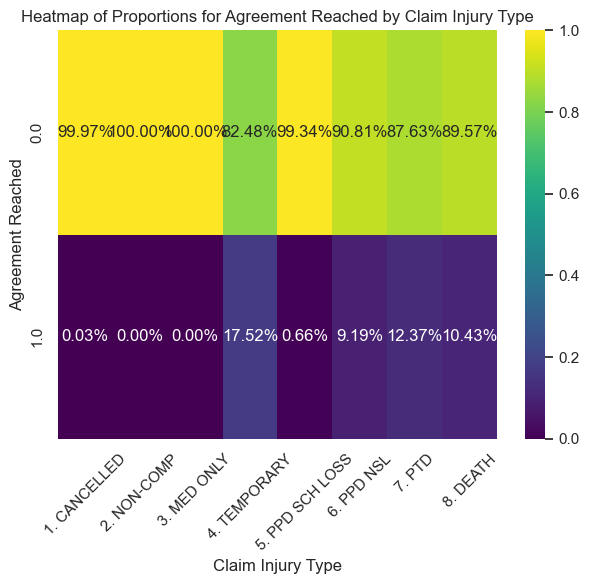

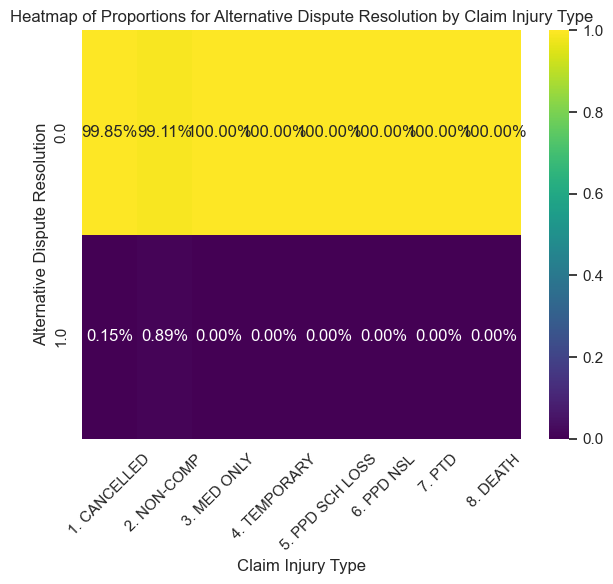

In [106]:
# Loop through binary columns and create a heatmap for each
for column in binary_columns:
    plt.figure(figsize=(12, 6))
    
    # Create a pivot table counting the occurrences of each combination
    count_data = df.groupby([column, 'Claim Injury Type']).size().unstack(fill_value=0)
    
    # Calculate proportions
    proportions = count_data.div(count_data.sum(axis=0), axis=1)
    
    # Plot heatmap of proportions
    ax2 = plt.subplot(1, 2, 2)
    sns.heatmap(proportions, annot=True, fmt=".2%", cmap="viridis", cbar=True, ax=ax2)
    ax2.set_title(f'Heatmap of Proportions for {column} by Claim Injury Type')
    ax2.set_xlabel('Claim Injury Type')
    ax2.set_ylabel(column)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

From the plots above, we observe that when the binary variable __`Alternative Dispute Resolution`__ is analyzed against categorical variables, it rarely has a value of 1, and is predominantly 0. This suggests that __`Alternative Dispute Resolution`__ has minimal or no impact on other variables. Therefore, we have decided to remove this variable from further analysis.

In [667]:
#Delete Alternative Dispute Resolution
df = df.drop(['Alternative Dispute Resolution'], axis=1)

#Apply to the test set
df_test = df_test.drop(['Alternative Dispute Resolution'], axis=1)

__`Contingency Table`__

In the following code, we will analyze the differents combinations between COVID-19 Indicator and Agreement Reached and how it influences the target variable: Claim Injury Type.

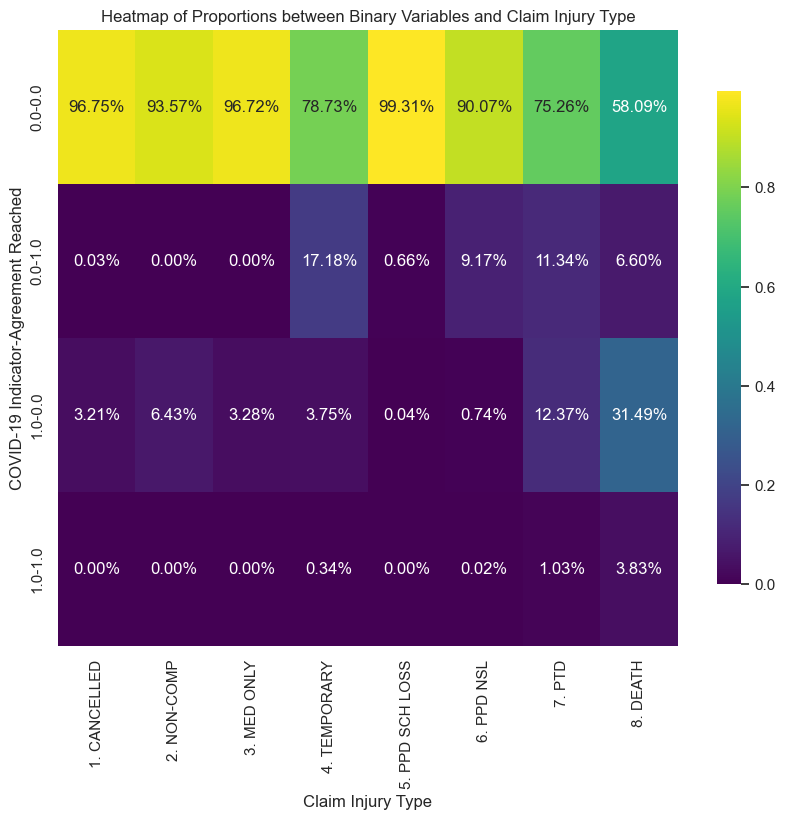

In [668]:
# Calculate the contingency table
contingency_table = pd.crosstab([df['COVID-19 Indicator'], df['Agreement Reached']], df['Claim Injury Type'])

# Calculate proportions
proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Plot the heatmap of proportions
plt.figure(figsize=(10, 8))
sns.heatmap(proportions, annot=True, cmap="viridis", fmt=".2%", cbar_kws={"shrink": .8})
plt.title("Heatmap of Proportions between Binary Variables and Claim Injury Type")
plt.show()

This heatmap highlights the proportions of different claim injury types for each binary variable.

Notable findings include:

- High Proportions in No COVID-19 Cases: The "0.0-0.0" category, representing cases with no COVID-19 association and no agreement reached, shows high proportions across most claim injury types, suggesting a strong pattern in non-COVID-19 related claims.

- Specific Injury Types and Agreement Reached: Categories like "1.0-0.0" (COVID-19 associated, no agreement) show significant proportions for serious claim types such as PTD and DEATH. This indicates that COVID-19 related claims with no agreement reached are more likely to result in severe outcomes.

These observations suggest potential areas for focused interventions and adjustments in handling claims based on COVID-19 association and agreement status.

In the following code, we will analyze the differents combinations between all the binary columns and how it influences the target variable.

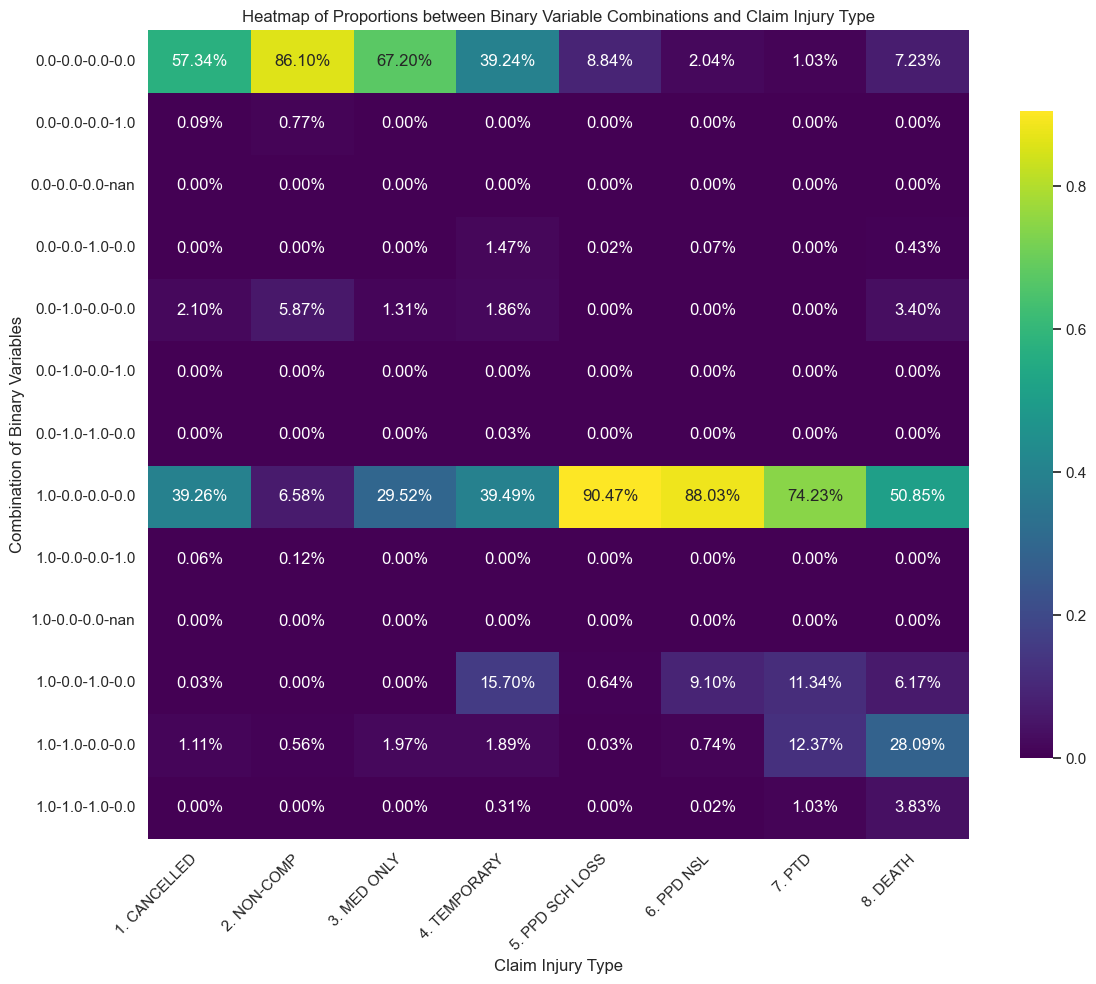

In [111]:
# Combine binary variables into a single column
df['Binary Combination'] = df[binary_columns].astype(str).agg('-'.join, axis=1)

# Calculate the contingency table
contingency_table = pd.crosstab(df['Binary Combination'], df['Claim Injury Type'])

# Calculate proportions
proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Plot the heatmap of proportions
plt.figure(figsize=(12, 10))
sns.heatmap(proportions, annot=True, cmap="viridis", fmt=".2%", cbar_kws={"shrink": .8})
plt.title("Heatmap of Proportions between Binary Variable Combinations and Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Combination of Binary Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

| Columns \ Binary Values | Attorney/ Representative | COVID-19 Indicator | Agreement Reached |
|-------------------------|--------------------------|--------------------|-------------------|
| 0                       | No                       | Not associated     | Needed WCB        | 
| 1                       | Yes                      | Associated         | Didn't need WCB   | 


1. Impact of COVID-19 Indicator:

The 1.0-0.0 combination (claims with an Attorney/Representative but no COVID-19 association) shows significantly high proportions for serious claim types such as PPD NSL (90.47%) and PPD SCH LOSS (88.03%). This suggests a strong pattern in non-COVID-19 related claims with attorney involvement.

2. Agreement Reached:

The 0.0-0.0-1.0 combination (claims without an Attorney/Representative, not associated with COVID-19, but with an agreement reached) generally shows very low proportions across all claim injury types. This indicates that agreements are less common in claims without attorney involvement.

3. Attorney/Representative:

Claims involving an Attorney/Representative (1.0) have higher proportions in serious claim types such as PPD NSL, PPD SCH LOSS, and PTD. This highlights the critical role of attorney involvement in more severe or complex claims.

By focusing on the binary variables Attorney/Representative, COVID-19 Indicator, and Agreement Reached, the heatmap helps identify key patterns and relationships that can inform better decision-making and targeted interventions. This streamlined approach provides a clearer and more focused view of the data.

In [671]:
#Delete Binary Combination
df = df.drop(['Binary Combination'], axis=1)

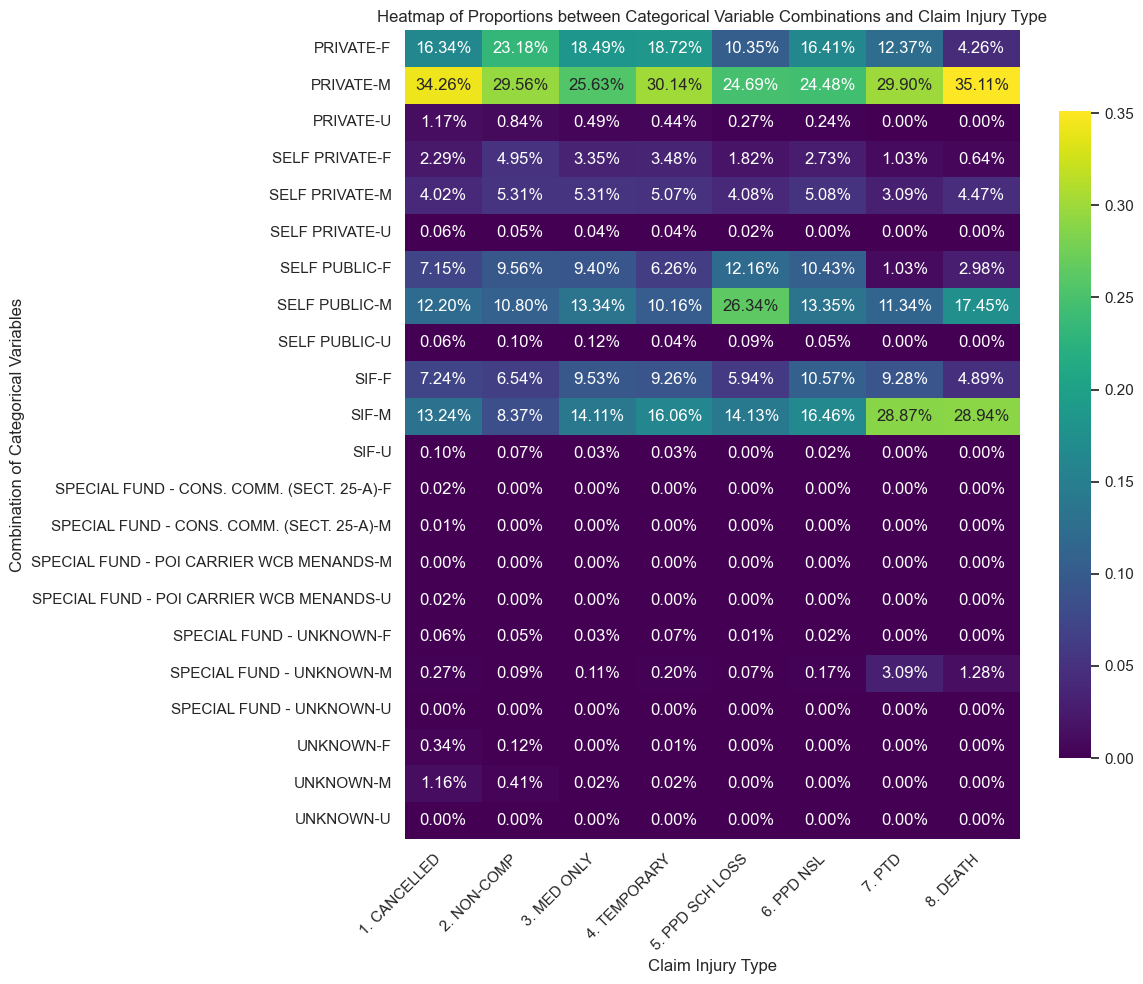

In [ ]:
# Select categorical columns to combine
categorical_columns = ['Carrier Type', 'Gender']  # Choose a few columns to avoid high cardinality issues

# Create a new column that combines the chosen categorical variables
# Converts each value in the selected columns to a string, then joins them with a '-' separator
df['Category Combination'] = df[categorical_columns].astype(str).agg('-'.join, axis=1)

# Create the contingency table between the combination of categorical variables and Claim Injury Type
contingency_table = pd.crosstab(df['Category Combination'], df['Claim Injury Type'])

# Calculate proportions
# Divides each value in the contingency table by the column sum to get proportions (normalized across columns)
proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Plot the heatmap of proportions
plt.figure(figsize=(12, 10))
sns.heatmap(proportions, annot=True, cmap="viridis", fmt=".2%", cbar_kws={"shrink": .8})

# Add plot titles and labels
plt.title("Heatmap of Proportions between Categorical Variable Combinations and Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Combination of Categorical Variables")

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

From the heatmap, several insights and potential actions can be identified:

- Merging Special Funds: The proportions for the different SPECIAL FUND categories are quite low and similar across most claim injury types. This suggests that these categories (like CONS. COMM. (SECT. 25-A), POI CARRIER WCB MENANDS, UNKNOWN) could be merged into a single SPECIAL FUND category to simplify the data without losing significant information. This consolidation could help streamline the analysis process and make the insights more manageable.

- Gender Differences: There are noticeable differences in proportions between genders within the same carrier type. For instance, PRIVATE-M has higher proportions across several claim injury types compared to PRIVATE-F and PRIVATE-U. This indicates that gender-specific analysis could be important for deriving more accurate and relevant insights.

- High Proportions in Specific Categories: Certain combinations stand out with significantly higher proportions in specific claim injury types. For example, PRIVATE-M has a high proportion in the DEATH category, and SIF-M shows high proportions in TEMPORARY and PTD. These high proportions could indicate areas that need targeted interventions or further investigation.

- Low Proportions in UNKNOWN Categories: The UNKNOWN categories generally have very low proportions across all claim injury types. This suggests that these categories might not be as relevant and could potentially be merged to reduce complexity without affecting the overall insights.

Let's drop Category Combination.

In [673]:
#Drop Category Combination
df = df.drop(['Category Combination'], axis=1)

As part of the multivariate analysis, we also chose to explore the relationship between Zip Code and County of Injury.

In [674]:
df['County of Injury'].unique()

array(['ST. LAWRENCE', 'WYOMING', 'ORANGE', 'DUTCHESS', 'SUFFOLK',
       'ONONDAGA', 'RICHMOND', 'MONROE', 'KINGS', 'NEW YORK', 'QUEENS',
       'WESTCHESTER', 'GREENE', 'NASSAU', 'ALBANY', 'ERIE', 'BRONX',
       'CAYUGA', 'NIAGARA', 'LIVINGSTON', 'WASHINGTON', 'MADISON',
       'WARREN', 'SENECA', 'GENESEE', 'SARATOGA', 'CHAUTAUQUA',
       'COLUMBIA', 'RENSSELAER', 'CATTARAUGUS', 'ROCKLAND', 'SCHUYLER',
       'BROOME', 'ULSTER', 'CLINTON', 'ONEIDA', 'UNKNOWN', 'MONTGOMERY',
       'ONTARIO', 'SCHENECTADY', 'CHEMUNG', 'YATES', 'HERKIMER',
       'ALLEGANY', 'TIOGA', 'FULTON', 'DELAWARE', 'TOMPKINS', 'PUTNAM',
       'OSWEGO', 'LEWIS', 'ESSEX', 'OTSEGO', 'CORTLAND', 'ORLEANS',
       'SULLIVAN', 'CHENANGO', 'FRANKLIN', 'WAYNE', 'JEFFERSON',
       'STEUBEN', 'SCHOHARIE', 'HAMILTON'], dtype=object)

In [675]:
# Count the number of unique values in the 'County of Injury' column
unique_count = df['County of Injury'].nunique()

print(f"Number of unique values in 'County of Injury': {unique_count}")

Number of unique values in 'County of Injury': 63


In [676]:
# Ensure ZipCode is treated as a string
df['Zip Code'] = df['Zip Code'].astype(str)

# Filter out rows where the first three characters are not digits
filtered_df = df[df['Zip Code'].str[:3].str.isdigit()]

# Convert the first three digits to integers and count rows in the range 100-149
count = filtered_df[filtered_df['Zip Code'].str[:3].astype(int).between(100, 149)].shape[0]

print(f"Number of rows where the first three digits of ZipCode are between 100 and 149: {count}")

Number of rows where the first three digits of ZipCode are between 100 and 149: 514180


In [677]:
#Proportion of Zip Codes that belong to New York
514183 / len(df)

0.8957517455716137

In [678]:
New_York_allcounties_caps = [
    "ALBANY", "ALLEGANY", "BRONX", "BROOME", "CATTARAUGUS", "CAYUGA", "CHAUTAUQUA", "CHEMUNG",
    "CHENANGO", "CLINTON", "COLUMBIA", "CORTLAND", "DELAWARE", "DUTCHESS", "ERIE", "ESSEX",
    "FRANKLIN", "FULTON", "GENESEE", "GREENE", "HAMILTON", "HERKIMER", "JEFFERSON", "KINGS",
    "LEWIS", "LIVINGSTON", "MADISON", "MONROE", "MONTGOMERY", "NASSAU", "NEW YORK", "NIAGARA",
    "ONEIDA", "ONONDAGA", "ONTARIO", "ORANGE", "ORLEANS", "OSWEGO", "OTSEGO", "PUTNAM", "QUEENS",
    "RENSSELAER", "RICHMOND", "ROCKLAND", "SARATOGA", "SCHENECTADY", "SCHOHARIE", "SCHUYLER",
    "SENECA", "ST. LAWRENCE", "STEUBEN", "SUFFOLK", "SULLIVAN", "TIOGA", "TOMPKINS", "ULSTER",
    "WARREN", "WASHINGTON", "WAYNE", "WESTCHESTER", "WYOMING", "YATES"
]

In [679]:
# Convert the 'county_of_injury' column to a set for comparison
used_counties = set(df['County of Injury'].dropna().str.title())  # Normalize case

# Compare with the New_York_allcounties list
used_in_list = used_counties.intersection(New_York_allcounties_caps)
not_used_in_list = set(New_York_allcounties_caps) - used_counties

# Results
print(f"Number of counties used in the dataset that match the New York counties: {len(used_in_list)}")
print(f"Counties used in the dataset that match: {sorted(used_in_list)}")
print(f"Number of New York counties not used in the dataset: {len(not_used_in_list)}")
print(f"Counties not used: {sorted(not_used_in_list)}")

Number of counties used in the dataset that match the New York counties: 0
Counties used in the dataset that match: []
Number of New York counties not used in the dataset: 62
Counties not used: ['ALBANY', 'ALLEGANY', 'BRONX', 'BROOME', 'CATTARAUGUS', 'CAYUGA', 'CHAUTAUQUA', 'CHEMUNG', 'CHENANGO', 'CLINTON', 'COLUMBIA', 'CORTLAND', 'DELAWARE', 'DUTCHESS', 'ERIE', 'ESSEX', 'FRANKLIN', 'FULTON', 'GENESEE', 'GREENE', 'HAMILTON', 'HERKIMER', 'JEFFERSON', 'KINGS', 'LEWIS', 'LIVINGSTON', 'MADISON', 'MONROE', 'MONTGOMERY', 'NASSAU', 'NEW YORK', 'NIAGARA', 'ONEIDA', 'ONONDAGA', 'ONTARIO', 'ORANGE', 'ORLEANS', 'OSWEGO', 'OTSEGO', 'PUTNAM', 'QUEENS', 'RENSSELAER', 'RICHMOND', 'ROCKLAND', 'SARATOGA', 'SCHENECTADY', 'SCHOHARIE', 'SCHUYLER', 'SENECA', 'ST. LAWRENCE', 'STEUBEN', 'SUFFOLK', 'SULLIVAN', 'TIOGA', 'TOMPKINS', 'ULSTER', 'WARREN', 'WASHINGTON', 'WAYNE', 'WESTCHESTER', 'WYOMING', 'YATES']


In [680]:
# Count rows where 'County of Injury' is "Unknown"
unknown_count = df['County of Injury'].str.contains("UNKNOWN", na=False).sum()

print(f"Number of rows with 'Unknown' in 'County of Injury': {unknown_count}")

Number of rows with 'Unknown' in 'County of Injury': 1195


In [681]:
df.isnull().sum()

Accident Date                   3687
Age at Injury                  59993
Assembly Date                   1407
Attorney/Representative            0
Average Weekly Wage            28651
Birth Year                     55033
C-2 Date                       15540
C-3 Date                      386781
Carrier Name                       0
Carrier Type                       0
Claim Injury Type                  0
County of Injury                   0
COVID-19 Indicator                 0
District Name                      0
First Hearing Date            423302
Gender                             0
IME-4 Count                   441221
Industry Code                   9956
Medical Fee Region                 0
WCIO Cause of Injury Code      15638
WCIO Nature of Injury Code     15655
WCIO Part Of Body Code         17080
Zip Code                           0
Agreement Reached                  0
Number of Dependents               0
dtype: int64

This means that we can choose between the variable Zip Code and County of Injury since they are explaining the same thing about our data. As we saw that 88 percent of Zip Codes can be explained by the variable County of Injury and that the place where people work is even more important than the place where people live we decided to drop Zip Code and use only County of Injury.


# 5. Save Dataset for Preprocessing <a class="anchor" id="chapter5"></a>

[Back to ToC](#toc)<br>

In this section, we save the processed dataset, cleaned of inconsistencies and ready for further preprocessing steps. To maintain an organized workflow, we create a dedicated folder to store intermediate datasets. These datasets will serve as inputs for the next notebook, ensuring seamless integration between steps in the hierarchical classification pipeline.

In [682]:
df.head(3)

Accident Date  Age at Injury Assembly Date  \
Claim Identifier                                              
5393875             2019-12-30           31.0    2020-01-01   
5393091             2019-08-30           46.0    2020-01-01   
5393889             2019-12-06           40.0    2020-01-01   

                  Attorney/Representative  Average Weekly Wage  Birth Year  \
Claim Identifier                                                             
5393875                               0.0                  0.0      1988.0   
5393091                               1.0               1746.0      1973.0   
5393889                               0.0               1435.0      1979.0   

                   C-2 Date   C-3 Date                  Carrier Name  \
Claim Identifier                                                       
5393875          2019-12-31        NaT    NEW HAMPSHIRE INSURANCE CO   
5393091          2020-01-01 2020-01-14  ZURICH AMERICAN INSURANCE CO   
5393889          2020-01-01        NaT     INDEMNITY INSURANCE CO OF   

                 Carrier Type  ... Gender IME-4 Count  Industry Code  \
Claim Identifier               ...                                     
5393875               PRIVATE  ...      M         NaN           44.0   
5393091               PRIVATE  ...      F         4.0           23.0   
5393889               PRIVATE  ...      M         NaN           56.0   

                 Medical Fee Region WCIO Cause of Injury Code  \
Claim Identifier                                                
5393875                           I                      27.0   
5393091                           I                      97.0   
5393889                          II                      79.0   

                 WCIO Nature of Injury Code  WCIO Part Of Body Code  Zip Code  \
Claim Identifier                                                                
5393875                                10.0                    62.0     13662   
5393091                                49.0                    38.0     14569   
5393889                                 7.0                    10.0     12589   

                 Agreement Reached  Number of Dependents  
Claim Identifier                                          
5393875                        0.0                   1.0  
5393091                        1.0                   4.0  
5393889                        0.0                   6.0  

[3 rows x 25 columns]

In [683]:
df_test.head(3)

Accident Date  Age at Injury Assembly Date  \
Claim Identifier                                              
6165911             2022-12-24           19.0    2023-01-02   
6166141             2022-11-20           19.0    2023-01-02   
6165907             2022-12-26           59.0    2023-01-02   

                  Attorney/Representative  Average Weekly Wage  Birth Year  \
Claim Identifier                                                             
6165911                                 0                  NaN      2003.0   
6166141                                 0                  NaN      2003.0   
6165907                                 0                  0.0      1963.0   

                   C-2 Date C-3 Date               Carrier Name Carrier Type  \
Claim Identifier                                                               
6165911          2023-01-02      NaT  INDEMNITY INSURANCE CO OF      PRIVATE   
6166141          2023-01-02      NaT    A I U INSURANCE COMPANY      PRIVATE   
6165907          2022-12-31      NaT  AMGUARD INSURANCE COMPANY      PRIVATE   

                  ... Gender  IME-4 Count Industry Code Medical Fee Region  \
Claim Identifier  ...                                                        
6165911           ...      M          NaN          48.0                 IV   
6166141           ...      F          NaN          45.0                 IV   
6165907           ...      F          NaN          56.0                III   

                 WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
Claim Identifier                                                         
6165911                               31.0                        10.0   
6166141                               75.0                        10.0   
6165907                               68.0                        49.0   

                  WCIO Part Of Body Code Zip Code  Number of Dependents  \
Claim Identifier                                                          
6165911                             54.0    10466                     1   
6166141                             10.0    11691                     1   
6165907                             62.0    10604                     0   

                  Accident Year  
Claim Identifier                 
6165911                  2022.0  
6166141                  2022.0  
6165907                  2022.0  

[3 rows x 24 columns]

In [684]:
# Define the folder path for storing intermediate datasets
output_folder = "../processed_datasets"

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created folder: {output_folder}")

# Save the training dataset (df) to a CSV file
train_file_path = os.path.join(output_folder, "cleaned_train_dataset.csv")
df.to_csv(train_file_path, index=True)
print(f"Training dataset saved to: {train_file_path}")

# Save the test dataset (df_test) to a CSV file
test_file_path = os.path.join(output_folder, "cleaned_test_dataset.csv")
df_test.to_csv(test_file_path, index=True)
print(f"Test dataset saved to: {test_file_path}")


Training dataset saved to: ../processed_datasets\cleaned_train_dataset.csv
Test dataset saved to: ../processed_datasets\cleaned_test_dataset.csv
